# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Data_engineers_Survey_results.csv')

# EDA

### head

In [4]:
df.head()

,GENDER,AGE,EMPLOYMENT,STATE,REGION,EDUCATION,QA_M1,QA_M2,QA_M3,QA_M4,...,Q14_M3,Q14_M4,Q14_M5,Q15,QE,QF,QG,QH,QI,QJ
0,Male,39,\tWork full-time,Wisconsin,Midwest,\tGraduate or post-graduate work,Maintain the distributed systems that execute ...,"Develop, maintain, and optimize data systems t...",Ensure that the data architecture will scale a...,Write and test code,...,NaN,NaN,NaN,Agree somewhat,10,10,11,1500,$50 Million to under $100 Million,Information technology (IT) / software
1,Male,39,\tWork full-time,Florida,South,\tBachelor’s degree,"Develop, maintain, and optimize data systems t...",Maintain the distributed systems that execute ...,Write and test code,Manage continuous integration and continuous d...,...,Lack of knowledge around what DataOps is,NaN,NaN,Agree somewhat,5,10,50,2000,$10 Million to under $25 Million,Banking
2,Male,34,\tWork full-time,Florida,South,\tGraduate or post-graduate work,Create data pipelines,"Develop, maintain, and optimize data systems t...",Write tests to ensure that bad data is detecte...,Maintain the distributed systems that execute ...,...,NaN,NaN,NaN,Agree strongly,10,15,20,20,$1 Billion or more,Information technology (IT) / software
3,Male,38,\tWork full-time,Wisconsin,Midwest,\tGraduate or post-graduate work,Maintain the distributed systems that execute ...,Maintain data in ready-to-use formats,Manage continuous integration and continuous d...,NaN,...,NaN,NaN,NaN,Agree strongly,18,18,45,250,$100 Million to under $250 Million,Information technology (IT) / software
4,Male,39,\tWork full-time,Georgia,South,\tGraduate or post-graduate work,Manage continuous integration and continuous d...,Maintain the distributed systems that execute ...,Maintain data in ready-to-use formats,"Develop, maintain, and optimize data systems t...",...,NaN,NaN,NaN,Agree somewhat,6,7,10,999,$250 Million to under $500 Million,Banking


### Shape

In [5]:
df.shape # This line shows number of rows and columns

(600, 46)

### Info

In [6]:
df.info() # It shows general information about data set columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GENDER      600 non-null    object
 1   AGE         600 non-null    int64 
 2   EMPLOYMENT  600 non-null    object
 3   STATE       600 non-null    object
 4   REGION      600 non-null    object
 5   EDUCATION   600 non-null    object
 6   QA_M1       600 non-null    object
 7   QA_M2       600 non-null    object
 8   QA_M3       600 non-null    object
 9   QA_M4       549 non-null    object
 10  QA_M5       400 non-null    object
 11  QA_M6       168 non-null    object
 12  QA_M7       34 non-null     object
 13  QA_M8       7 non-null      object
 14  QB          600 non-null    object
 15  QC          600 non-null    object
 16  QD          600 non-null    object
 17  Q1          600 non-null    object
 18  Q2          600 non-null    object
 19  Q3          600 non-null    int64 
 20  Q4        

### Describe

In [7]:
df.describe()

,AGE,Q3,Q4,QH
count,600.000000,600.000000,600.000000,600.000000
mean,42.405000,32.466667,27.690000,4058.343333
std,8.769406,18.496913,19.312747,17176.313424
min,21.000000,1.000000,0.000000,5.000000
25%,36.000000,20.000000,14.750000,500.000000
50%,41.000000,30.000000,20.000000,1000.000000
75%,50.000000,40.000000,40.000000,3000.000000
max,66.000000,100.000000,100.000000,273000.000000


In [8]:
df.isnull().sum()

GENDER          0
AGE             0
EMPLOYMENT      0
STATE           0
REGION          0
EDUCATION       0
QA_M1           0
QA_M2           0
QA_M3           0
QA_M4          51
QA_M5         200
QA_M6         432
QA_M7         566
QA_M8         593
QB              0
QC              0
QD              0
Q1              0
Q2              0
Q3              0
Q4              0
Q5_M1           0
Q5_M2          29
Q5_M3         146
Q5_M4         504
Q5_M5         591
Q6              0
Q7              0
Q8              0
Q9              0
Q10             0
Q11             0
Q12             0
Q13             0
Q14_M1        239
Q14_M2        247
Q14_M3        282
Q14_M4        489
Q14_M5        582
Q15             0
QE              0
QF              0
QG              0
QH              0
QI              0
QJ              0
dtype: int64

###  The nulls in these columns are from questions that have selecting  multiple answers

# Data Cleanse

## 1-Removing leading and trailing whitespace


In [9]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda df: df.str.strip())

## 2-Fixing Multiple Answer Columns
As this dataset is a survery answers, some questions have a multiple answer option which causes an increase in columns numbers.
That's why in the coming section we will tackle this issue and provide a more clear format

### 2.1 Fixing Q5answers columns

In [10]:
# As this dataset is a survery answers, some questions have a multiple answer option which causes an increase in columns numbers.
# That's why in the coming section we will tackle this issue and provide a more clear format

q5Answers = ['Focusing too much on maintaining data pipelines and/or manual processes',
    'Constantly playing catch up with stakeholder requests',
       'Focusing too much time on finding and fixing errors',
       'Unreasonable requests from stakeholders',
       'Fast pace of requests from stakeholders',
       'Lack of feedback on the products delivered',
       'I have never felt burnt out from my job']

colNames = ['Maintenance of Data Pipelines/Manual Processes','Catching up with Stakeholder Requests','Time Spent on Error Identification/Fixing','Unreasonable Stakeholder Requests','Fast-Paced Stakeholder Requests','Lack of Feedback on Delivered Products','Absence of Job Burnout Experience']
for i in range(len(q5Answers)):
    ans = q5Answers[i]
    df[colNames[i]] = np.where(
        (df["Q5_M1"] == ans) |
        (df["Q5_M2"] == ans) |
        (df["Q5_M3"] == ans) |
        (df["Q5_M4"] == ans) |
        (df["Q5_M5"] == ans),
        True,
        False
    )



### 2.2 Fixing QAanswers columns

In [11]:
qa_Answers = ['Maintain the distributed systems that execute data pipelines',
       'Ensure that the data architecture will scale appropriately',
       'Write and test code',
       'Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products',
       'Put analytics into production',
       'Write tests to ensure that bad data is detected and acted upon in production',
       'Maintain data in ready-to-use formats',
       'Develop, maintain, and optimize data systems to make data available for analysis',
       'Create data pipelines']
for i in ans:
    name = i[0:10].replace(" ", "_")
    df[f"{name}"] = np.where((df["QA_M1"] == i) |
                             (df["QA_M2"] == i) |
                             (df["QA_M3"] == i) |
                             (df["QA_M4"] == i) |
                             (df["QA_M5"] == i) |
                             (df["QA_M6"] == i) |
                             (df["QA_M7"] == i) |
                             (df["QA_M8"] == i) , True, False)


### 2.3 Fixing Q14answers columns

In [12]:
q14Ansewrs = ['Lack of buy-in from company leadership or other stakeholders','Lack of the right skills among employees','Organization isn’t sure how to implement this','Lack of knowledge around what DataOps is','Too busy to make it a priority','Difficulty communicating or engaging with other departments within company','Scale of incorporating DataOps is too large', 'We haven\'t budgeted or don\'t have the budget for this']
newColNames = ['buy-in', 'lack of skills', 'implementation','knowledge','priority', 'communication', 'scale','budget' ]

for i in range(len(q14Ansewrs)):
    ans = q14Ansewrs[i]
    df[newColNames[i]] = np.where(
        (df["Q14_M1"] == ans) |
        (df["Q14_M2"] == ans) |
        (df["Q14_M3"] == ans) |
        (df["Q14_M4"] == ans) |
        (df["Q14_M5"] == ans) , True, False)
    
    


### 2.3 droping Non-Binary records (3 records)

In [13]:
df.drop(df[df["GENDER"] == "Non-Binary"].index, inplace = True)

In [14]:
profile = ProfileReport(df, title='Report', html={'style':{'full-width': True}})
profile.to_notebook_iframe()

NameError: name 'ProfileReport' is not defined

# Data Analysis and Visualization 

## Chart format

In [15]:
sns.set_palette('ch:r=-.5,l=.75')
sns.set_style("whitegrid")

## What is the relationship between Work-Life Balance Disruption and Desire for Job-Therapist Support?

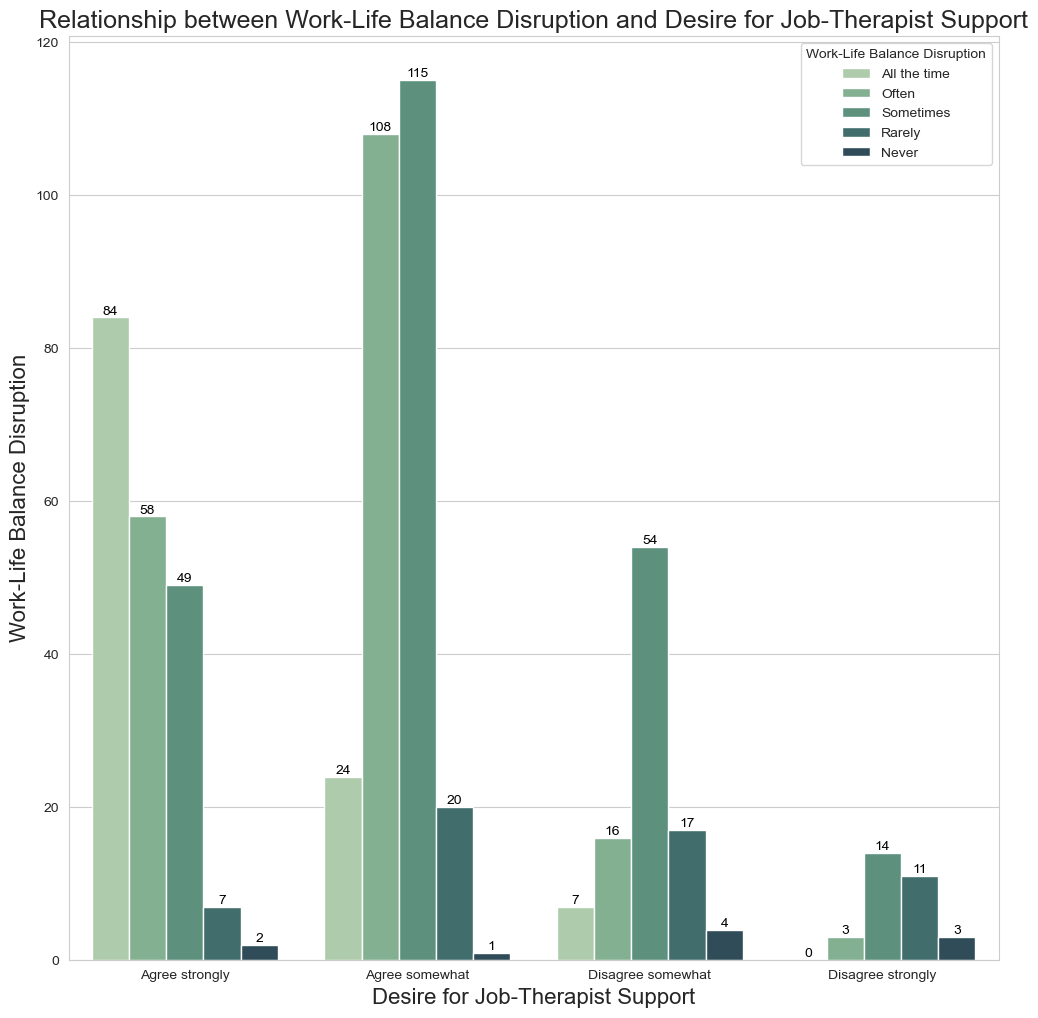

In [16]:
plt.figure(figsize=(12, 12))  # Adjust the figure size (e.g., 12 inches by 12 inches)

qx = sns.countplot(x='Q6', hue='Q8', data=df, hue_order=['All the time', 'Often', 'Sometimes', 'Rarely', 'Never'],
                   order=['Agree strongly', 'Agree somewhat', 'Disagree somewhat', 'Disagree strongly'])
insight1 = qx
for container in qx.containers:
    for bar in container:
        height = bar.get_height()
        qx.annotate(format(height, '.0f'), (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Desire for Job-Therapist Support', fontsize=16)  
plt.ylabel('Work-Life Balance Disruption', fontsize=16)  
plt.title('Relationship between Work-Life Balance Disruption and Desire for Job-Therapist Support', fontsize=18) 

legend = plt.legend()
legend.set_title('Work-Life Balance Disruption')

sns.set_palette('ch:r=-.5,l=.75')
sns.set_style("whitegrid")

plt.show()

- As shown in this chart most participants who are getting data requests that are not reasonable have a high need for a therapist support as this can affect their work-life balance

## What is the relationship between Work life balance and disruptiveness based on job title?

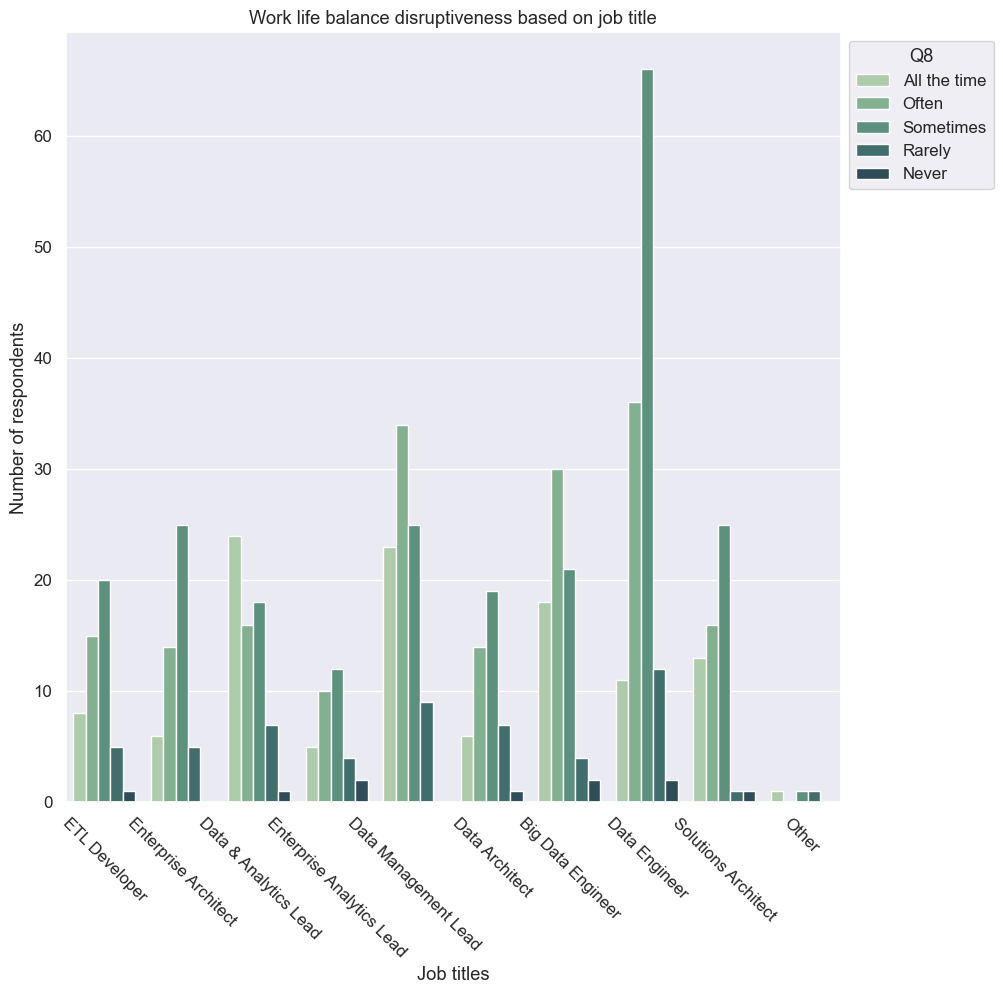

In [17]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(10,10))
sns.set_palette('ch:r=-.5,l=.75')
WLTitle = sns.countplot(data = df, x = 'QB', hue='Q8', hue_order=['All the time','Often','Sometimes','Rarely','Never'])
sns.move_legend(WLTitle, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=-45);
plt.title("Work life balance disruptiveness based on job title")
plt.ylabel("Number of respondents")
plt.xlabel('Job titles');

- Data & analytics lead mostly face work life balance issues compared to data engineers where a decent portion of participants only face rarely to never work life balance issues

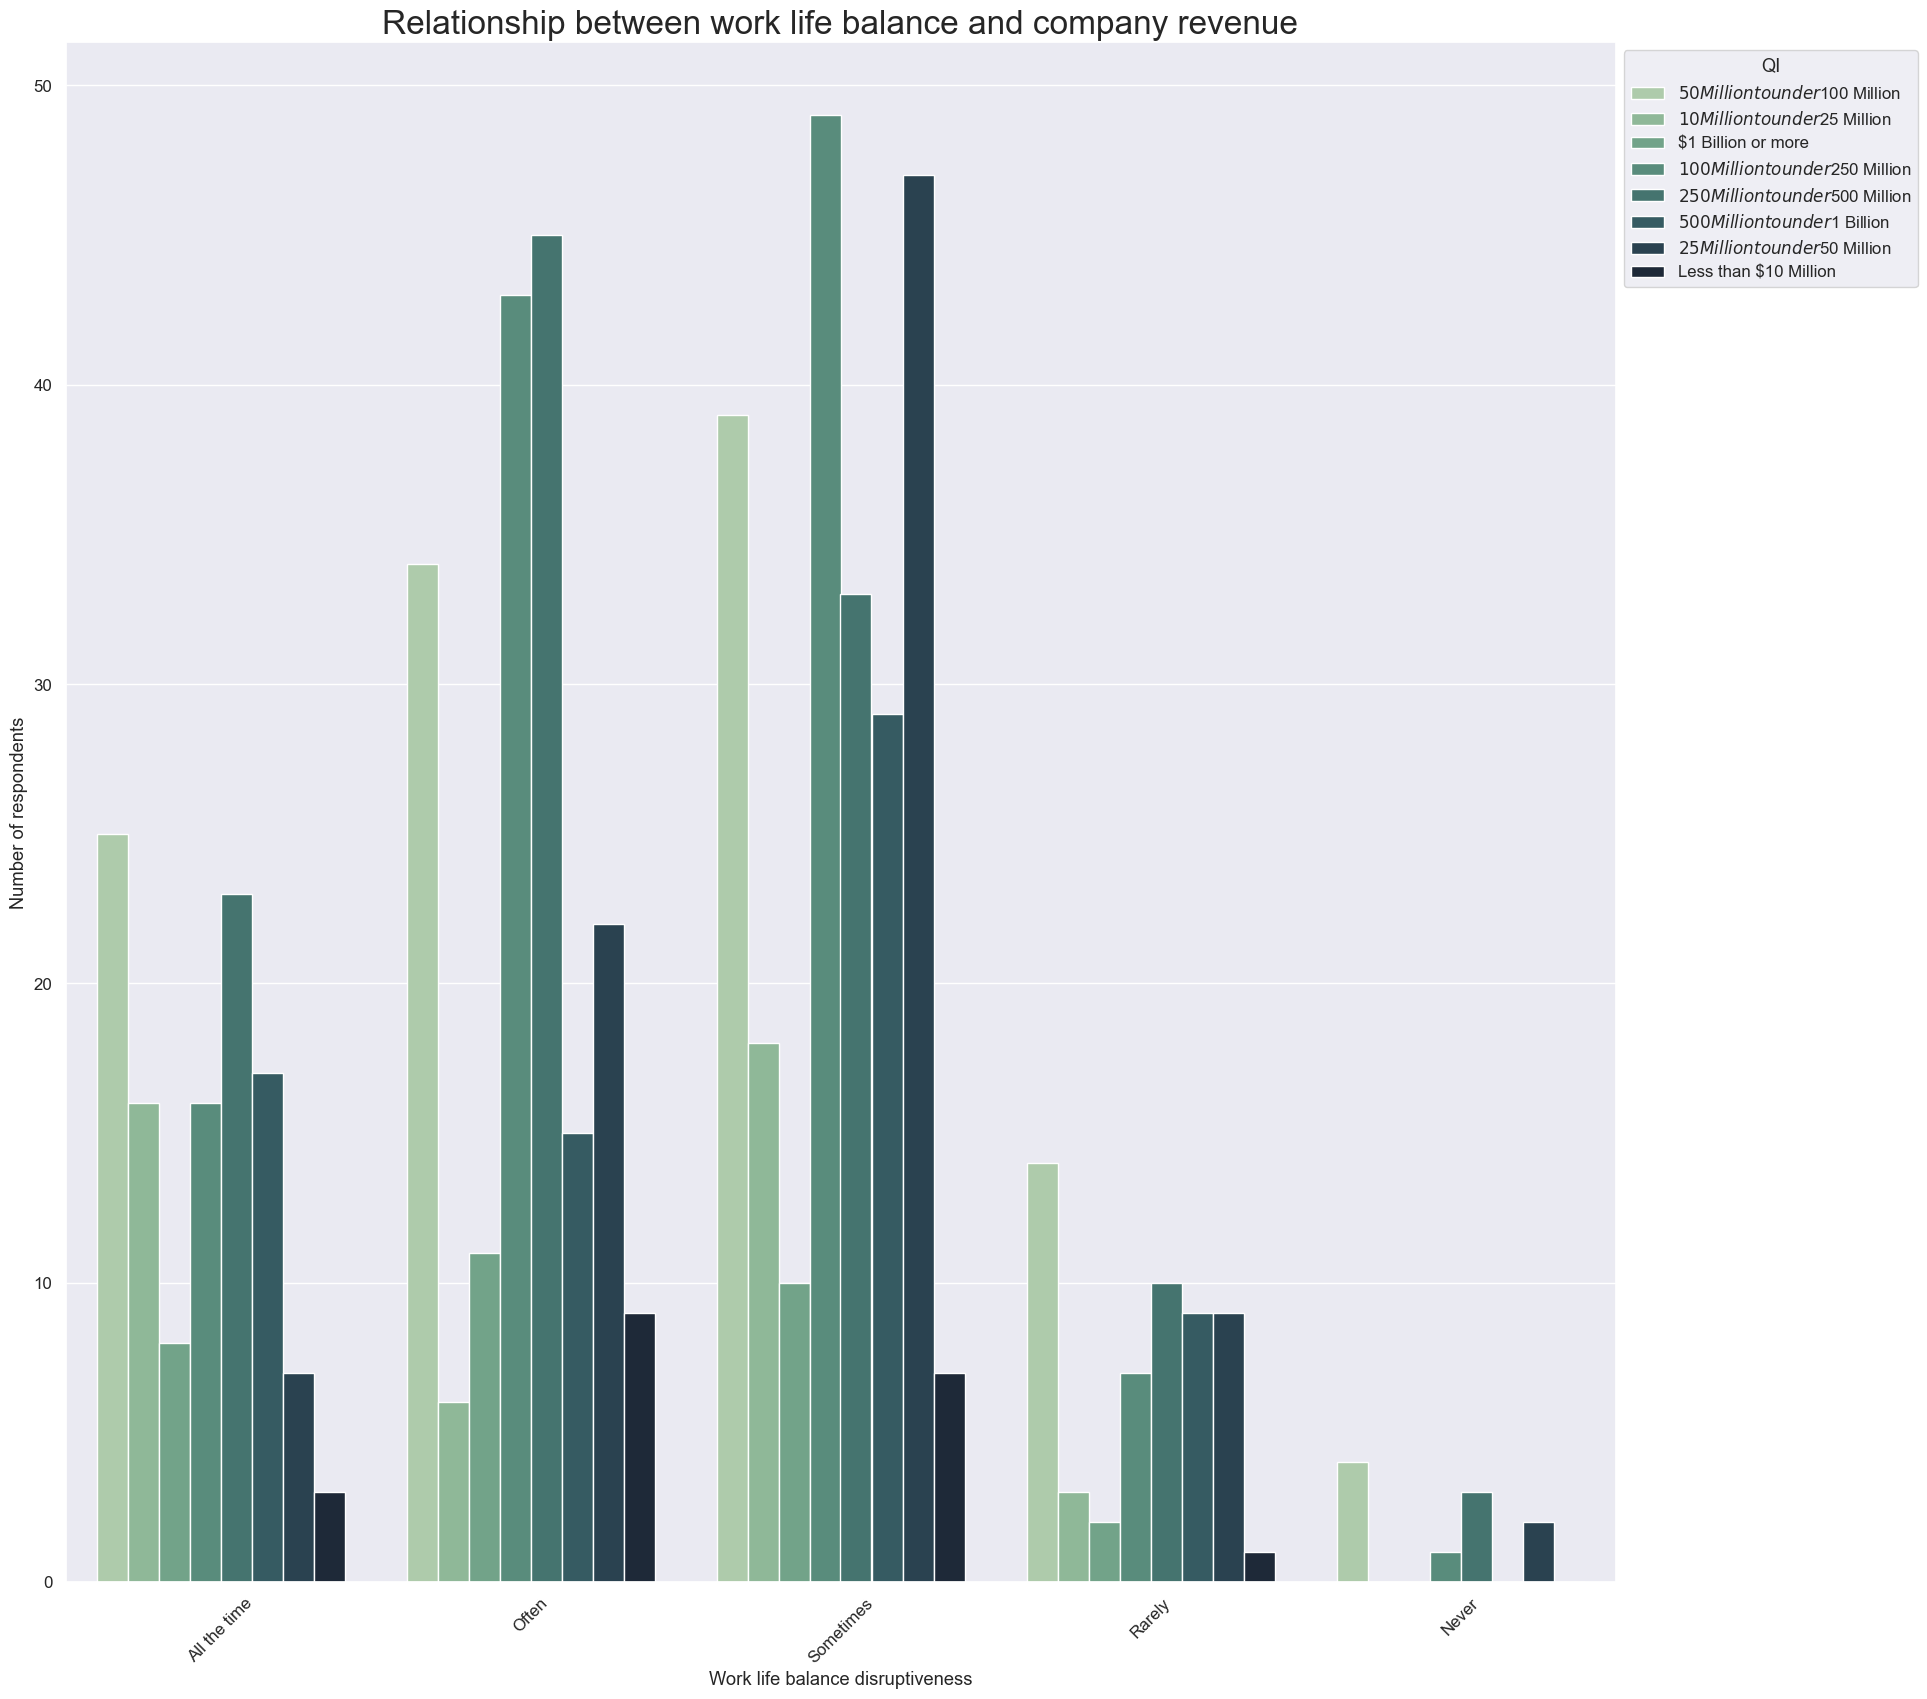

In [18]:
plt.figure(figsize=[20,20])
ordered = ['All the time','Often','Sometimes','Rarely','Never']
df['Q8'] = pd.Categorical(df['Q8'],ordered)
sns.set_palette('ch:r=-.5,l=.75')

WLRevenue = sns.countplot(data = df, x = 'Q8', hue = 'QI', palette = 'ch:r=-.5,l=.75' )
sns.move_legend(WLRevenue, "upper left", bbox_to_anchor=(1, 1))
sns.set(font_scale = 2)
plt.title('Relationship between work life balance and company revenue')
plt.xticks(rotation = 45)
plt.xlabel('Work life balance disruptiveness');
plt.ylabel("Number of respondents")


plt.show()

- For companies with revenue more than 500 million there is usually an imbalance between work and life
- Most work life disrubtness occures in companies with revenue between 25 million and 500 million

## How can DataOps contribute to enhancing collaboration effectiveness?

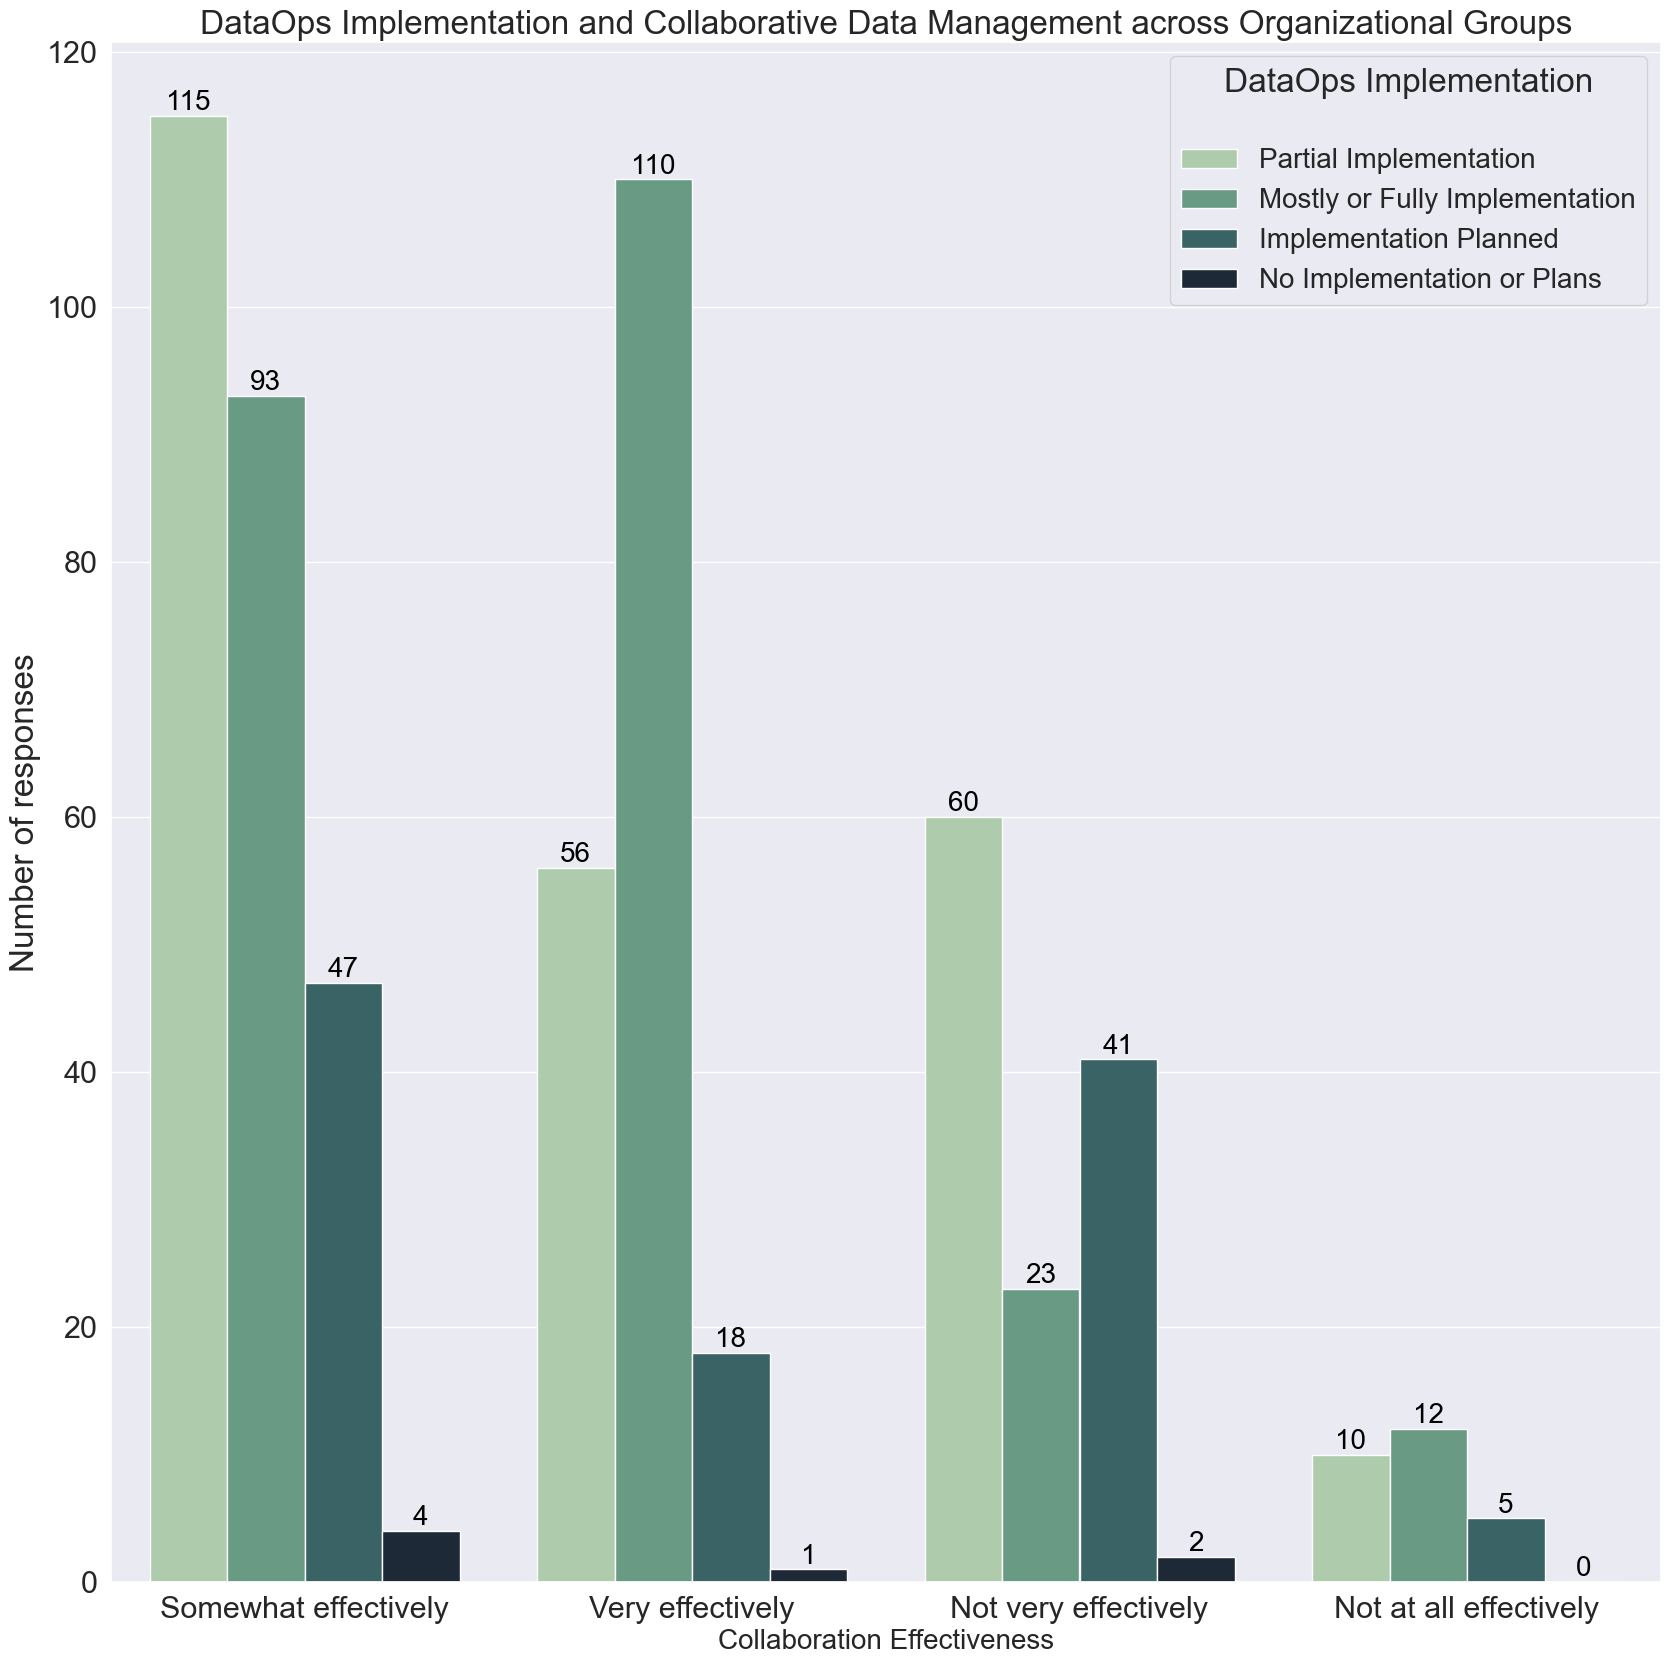

In [19]:
# Renaming values

replacement_dict = {
    'We have partially implemented DataOps into our company’s data processes': 'Partial Implementation',
    'We have mostly or fully implemented DataOps into our company’s data processes': 'Mostly or Fully Implementation',
    'We have not implemented DataOps into our processes, but have plans to': 'Implementation Planned',
    'We have not implemented DataOps into our processes, and have no plans to': 'No Implementation or Plans'
}

df['QD']= df['QD'].replace(replacement_dict)


plt.figure(figsize=[20, 20])
ax = sns.countplot(x='Q12', hue='QD', data=df,palette='ch:r=-.5,l=.75')

# Show each bar values -- to make sure values are accurate df.groupby(['Q12','QD']).size() This will show the details
ax.bar_label(ax.containers[0], label_type='edge', fontsize=20, color='black')
ax.bar_label(ax.containers[1], label_type='edge', fontsize=20, color='black')
ax.bar_label(ax.containers[2], label_type='edge', fontsize=20, color='black')
ax.bar_label(ax.containers[3], label_type='edge', fontsize=20, color='black')
plt.title("DataOps Implementation and Collaborative Data Management across Organizational Groups")
plt.xlabel('Collaboration Effectiveness',fontsize=20)
plt.ylabel('Number of responses')
legend = plt.legend(fontsize=20,loc='best')
legend.set_title('DataOps Implementation\n',)

plt.show()

- As shown in this graph the one's who have applied DataOps either partially or completely are communicating and collaborating effectevly with different teams in the process of creating and managing data model

## Does the adoption of DataOps practices have an impact on company revenue?

In [20]:
# Renaming values

replacement_dict = {
    'We have partially implemented DataOps into our company’s data processes': 'Partial Implementation',
    'We have mostly or fully implemented DataOps into our company’s data processes': 'Mostly or Fully Implementation',
    'We have not implemented DataOps into our processes, but have plans to': 'Implementation Planned',
    'We have not implemented DataOps into our processes, and have no plans to': 'No Implementation or Plans'
}

df['QD']= df['QD'].replace(replacement_dict)


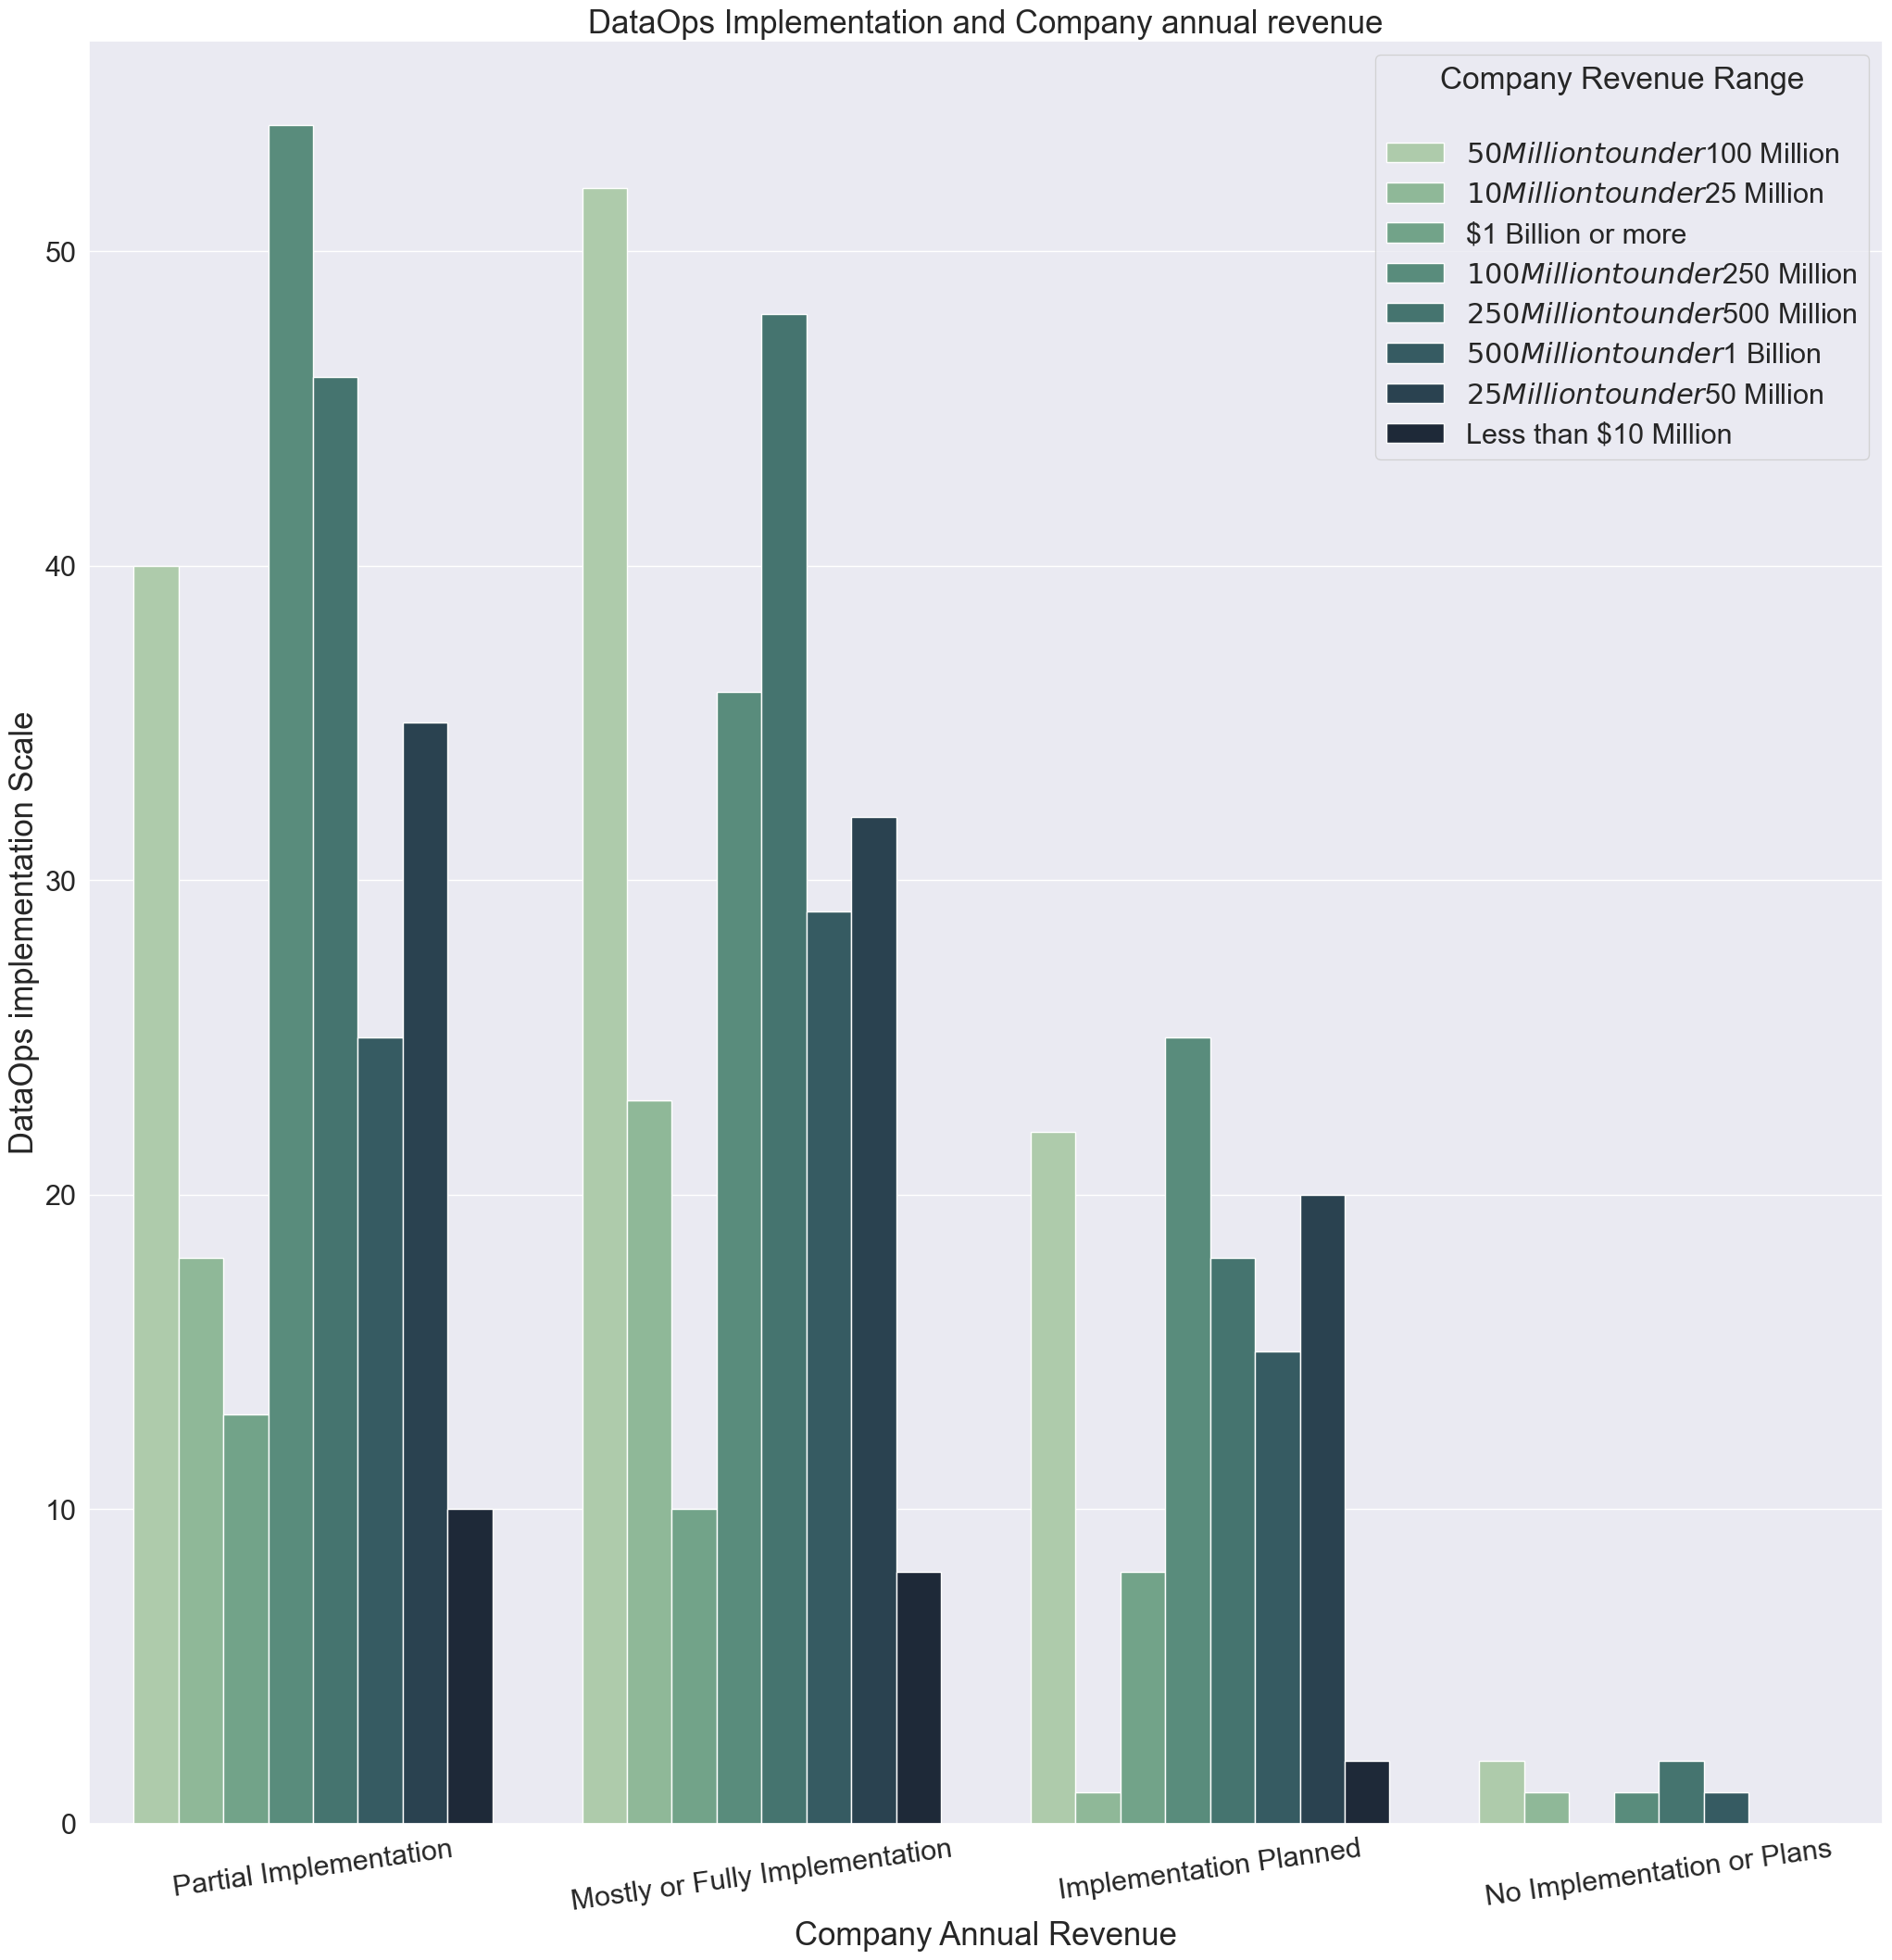

In [21]:
#insight 3
plt.figure(figsize=(25,25))
sns.countplot(x='QD',hue='QI',data=df,palette='ch:r=-.5,l=.75');
plt.xlabel('Company Annual Revenue',fontsize=25)
plt.ylabel('DataOps implementation Scale',fontsize=25)
plt.title('DataOps Implementation and Company annual revenue',fontsize=25)
legend = plt.legend()
legend.set_title('Company Revenue Range\n')
plt.xticks(rotation=8)
plt.show()

- Companies that are applying the pratices of DataOps are having a high revenue comapring it with comapanies that are not applying it

## How difficult does company's with DataOps data governance policies make your day-to-day job?

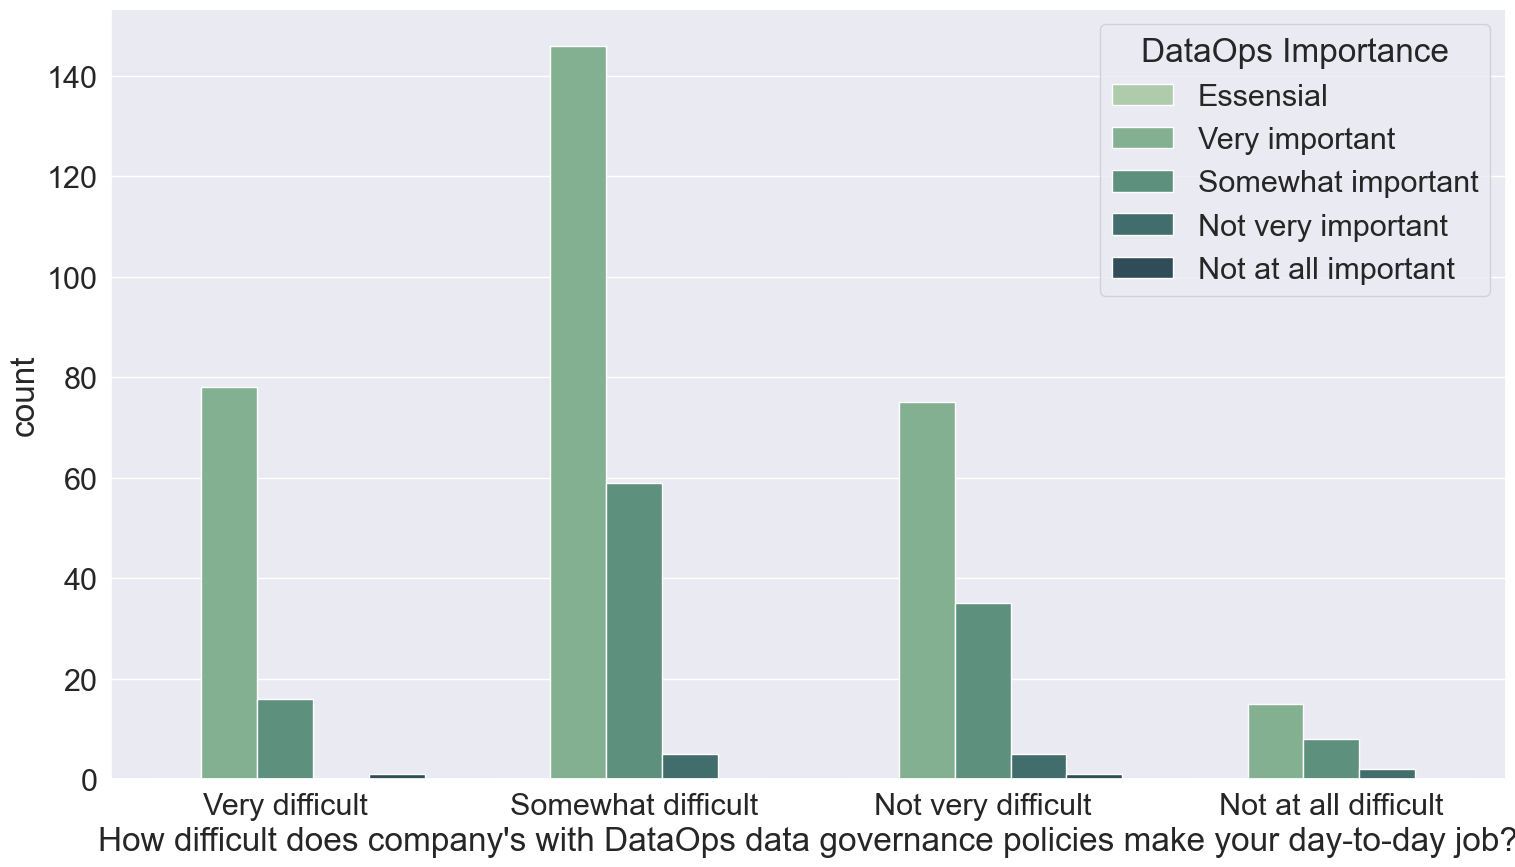

In [23]:
plt.figure(1, (18,10))
filtered_df = df[df['QH'] < 30000]
sns.set_palette('ch:r=-.5,l=.75')
sns.countplot(data=df,
            x="Q11",
            hue="Q13",
            order=["Very difficult", "Somewhat difficult", "Not very difficult", "Not at all difficult"],
            hue_order=["Essensial", "Very important", "Somewhat important", "Not very important","Not at all important"]

           )
plt.xlabel("How difficult does company's with DataOps data governance policies make your day-to-day job?")
plt.legend(title="DataOps Importance")
plt.show()

- The more the importance of DataOps the more employees face difficulties on their day-to-day job.

# how can cutting edge tools help in building analytics?

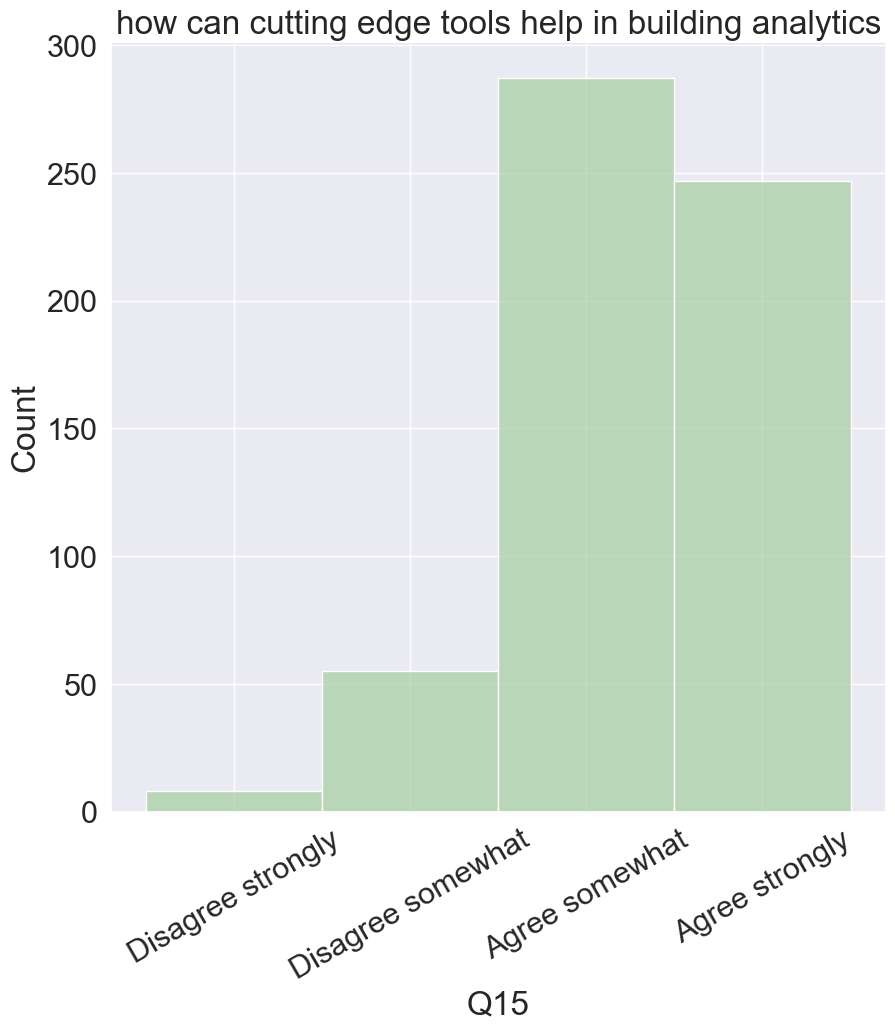

In [24]:
ordered = ['Disagree strongly','Disagree somewhat','Agree somewhat','Agree strongly']
plt.figure(figsize=[10,10])
df['Q15'] = pd.Categorical(df['Q15'],ordered)
q15Graph = sns.histplot(data = df, x = 'Q15');
plt.title('how can cutting edge tools help in building analytics')

plt.xticks(rotation = 30);

- The majority of the participants agree that using cutting edge tools for managing data and building analytics are ineffective without processes that deploy, monitor and manage analytics throughout the lifecycle.

## Is there a relationship between years of experience and company revenue?

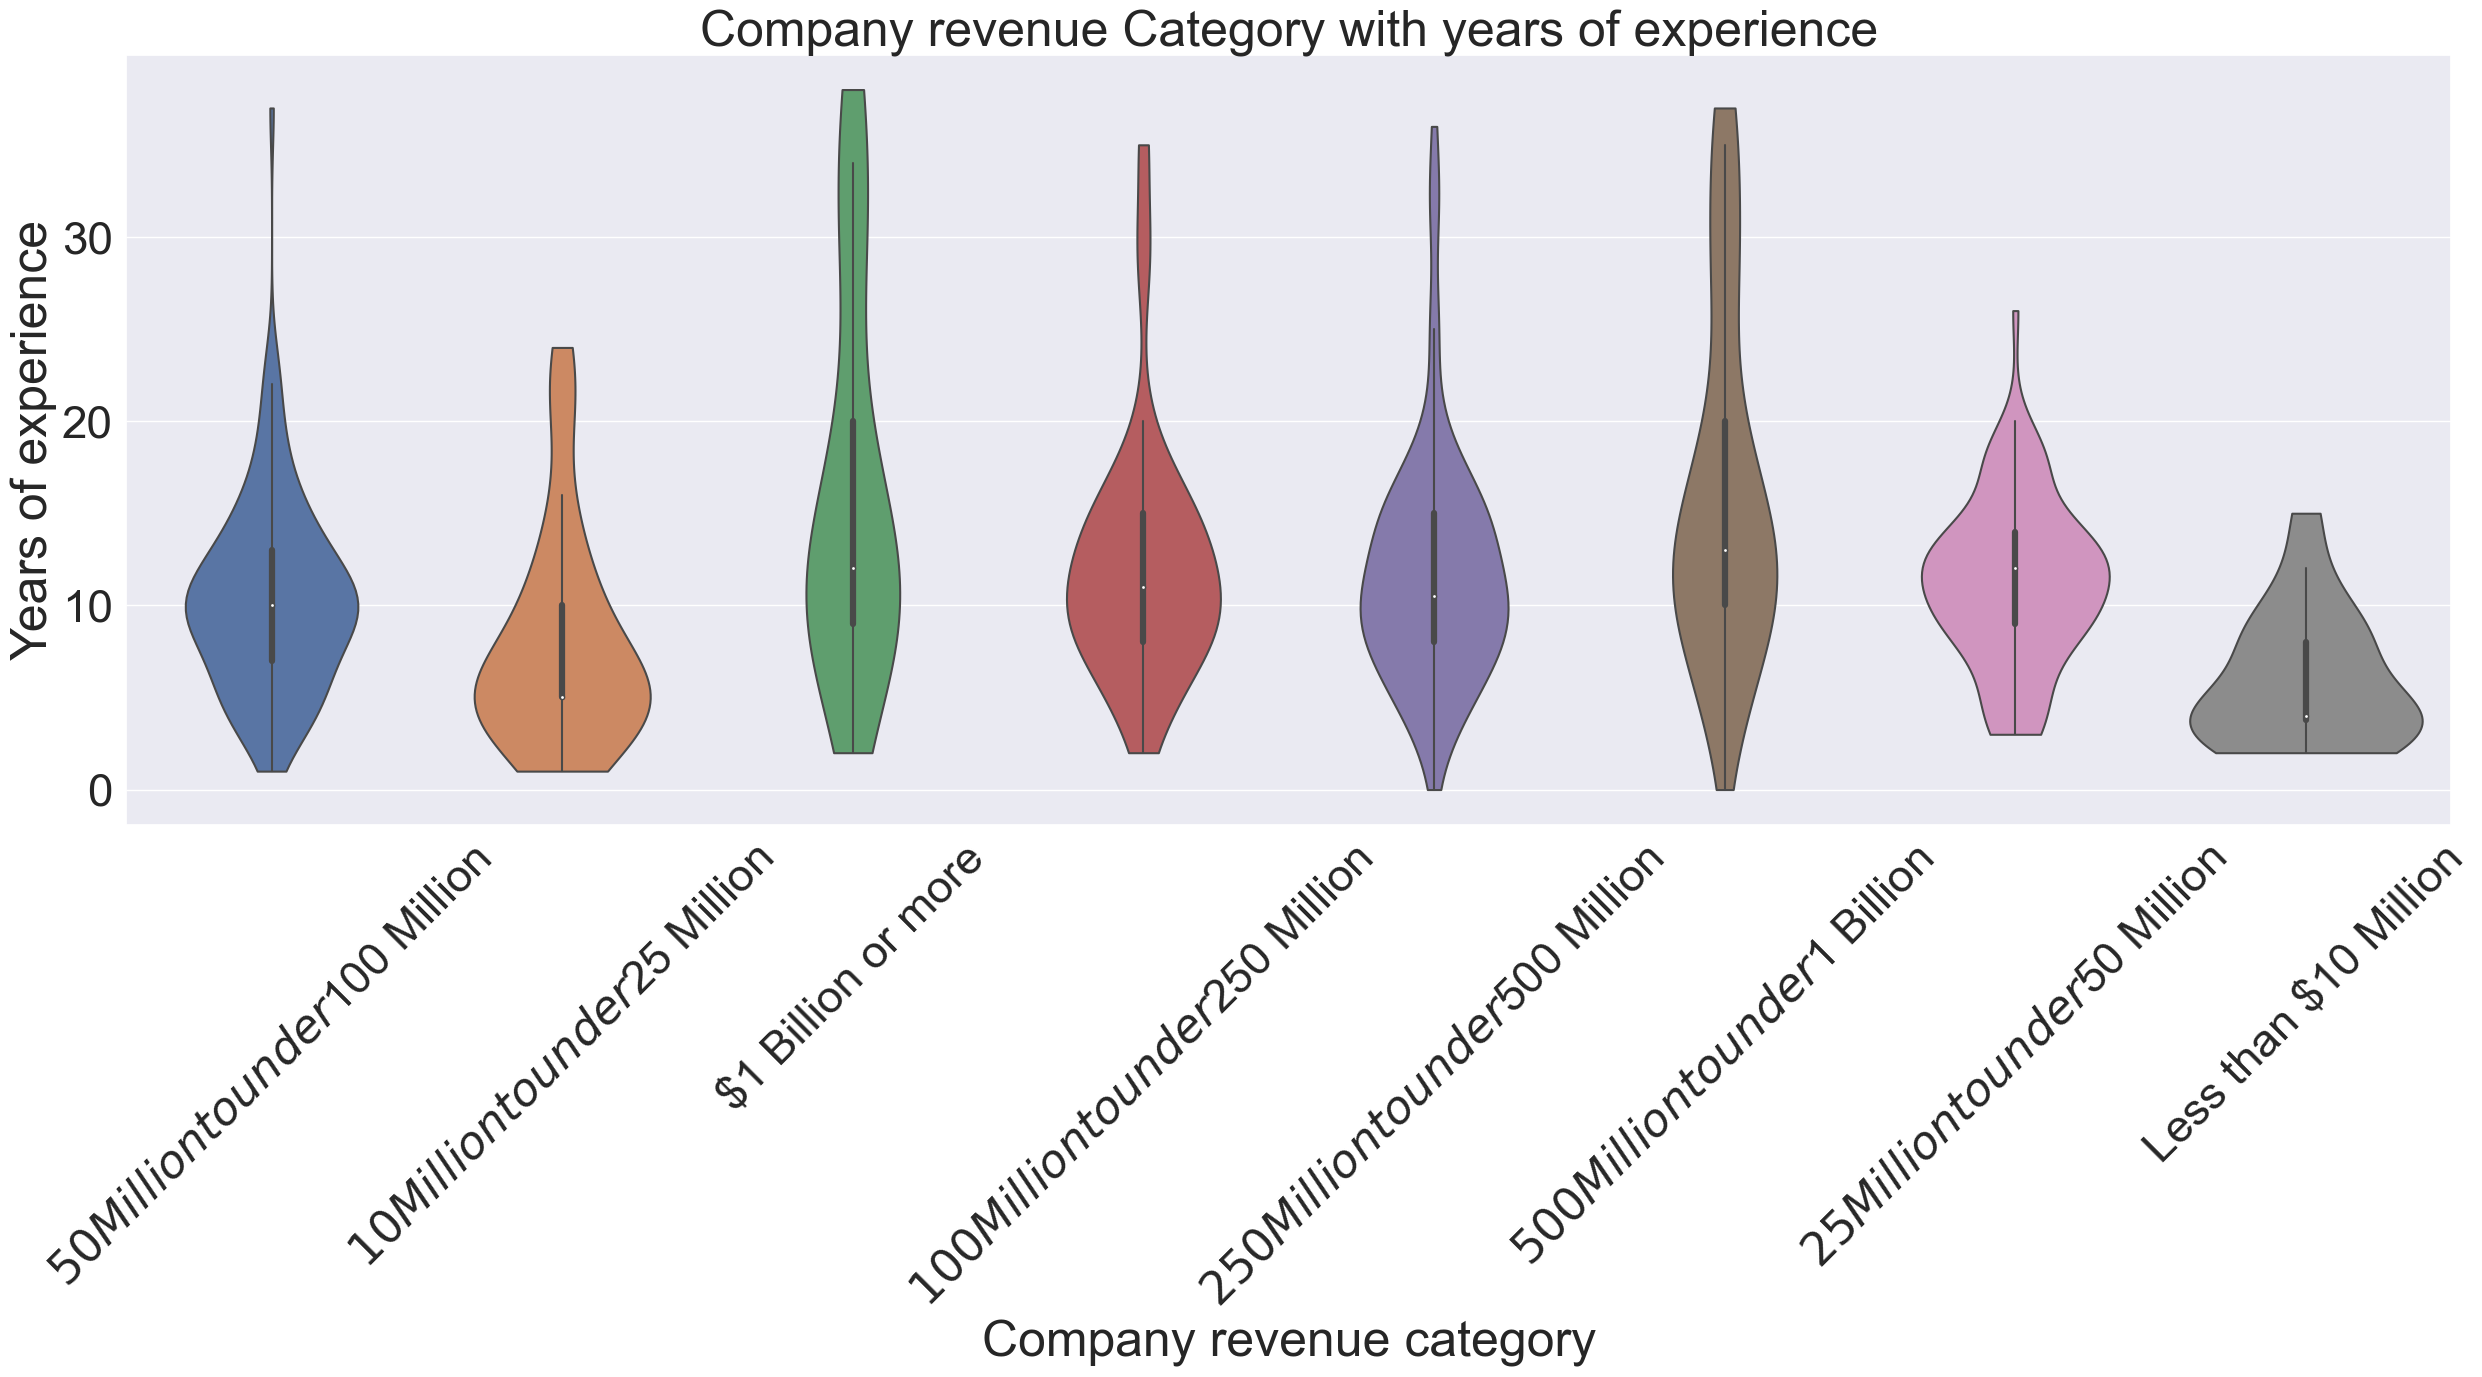

In [25]:
df['QE'].replace('Less than one year', 0, inplace=True)
df['QE'].astype(int)
plt.figure(figsize=[30,10])
 
sns.set(font_scale = 3)
ageCRev = sns.violinplot(data = df, x = 'QI', y = df['QE'].astype(int), cut = 0 )
plt.title("Company revenue Category with years of experience")
plt.ylabel("Years of experience");
plt.xlabel("Company revenue category");
plt.xticks(rotation = 45);

- For companies with revenue less than 25 million, the average employee has around 3-5 years of experience 
- For companies starting from 25 million revenue per year, the average employee has more that 10 years of experience 

## is there a relationship between years of experience and management positions?

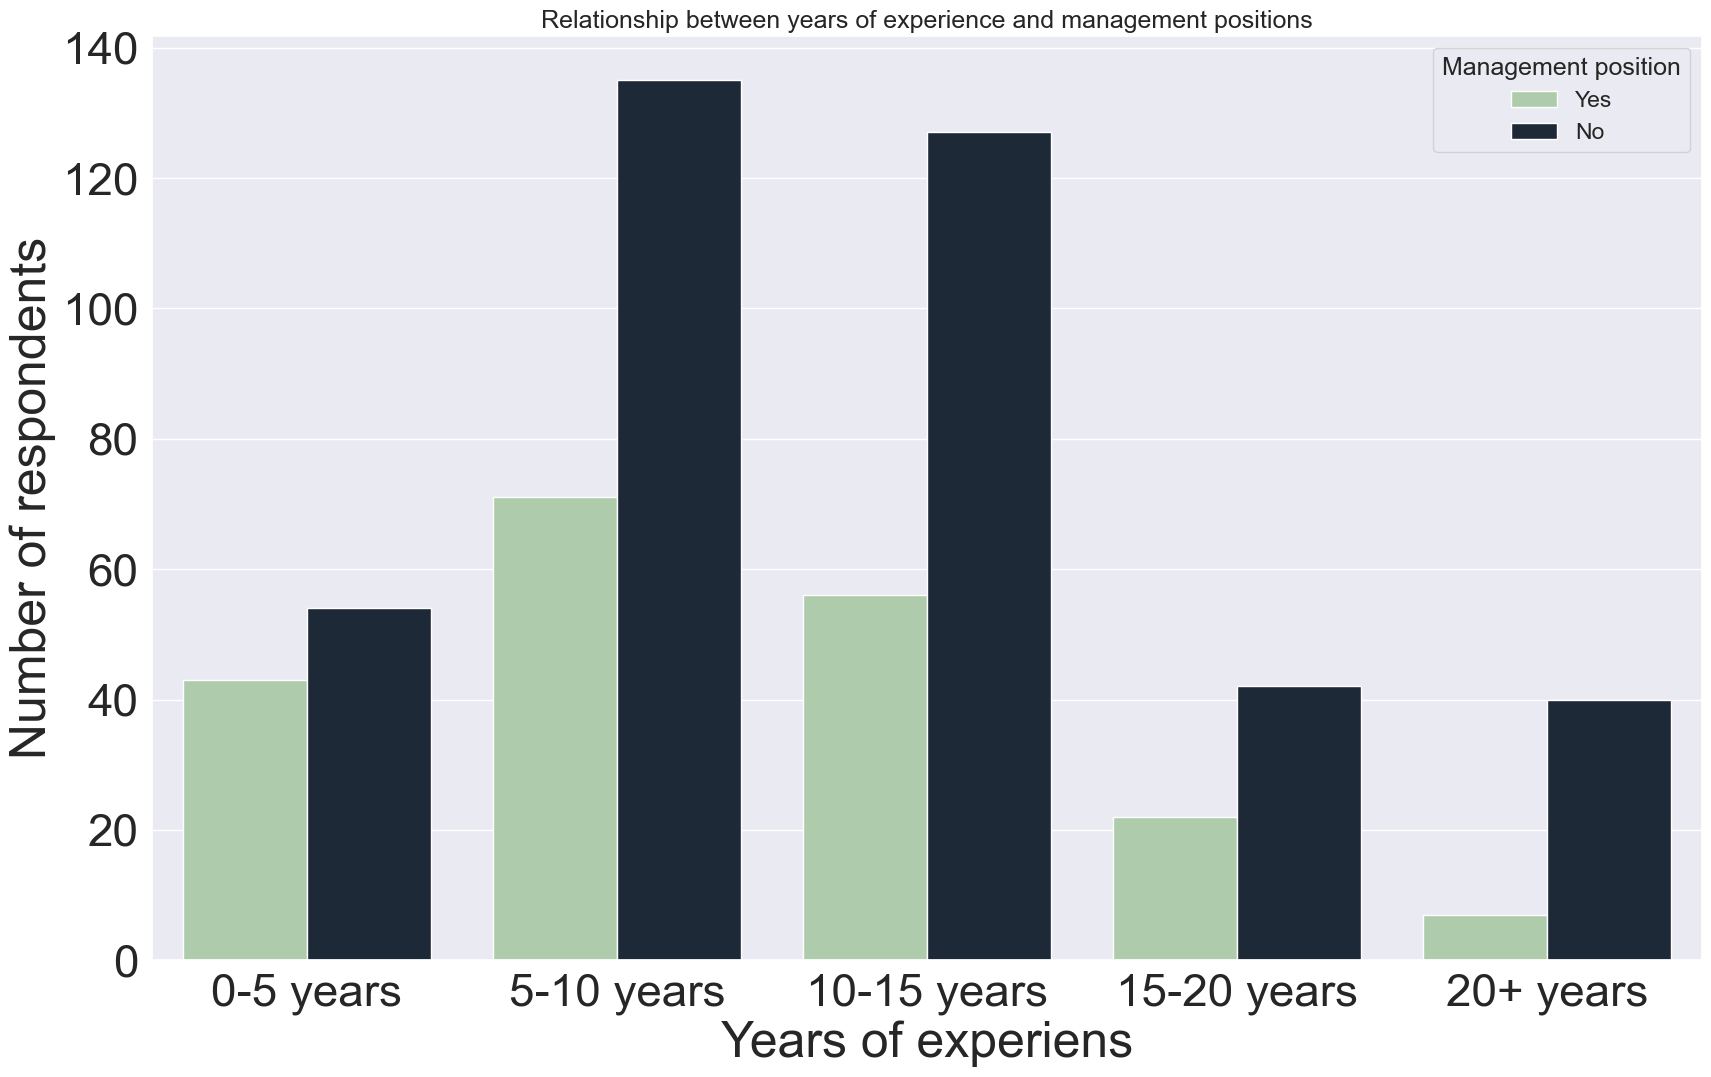

In [26]:
df['QE'].replace('Less than one year', 0, inplace=True)
df['QE'].astype(int)
def categorizeYOE(years):
    if years <= 5:
        return '0-5 years'
    elif years <= 10:
        return '5-10 years'
    elif years <= 15:
        return '10-15 years'
    elif years <= 20:
        return '15-20 years'
    else:
        return '20+ years'
df['YOECat'] = df['QE'].astype(int).apply(categorizeYOE)
orderedYOE = ['0-5 years','5-10 years','10-15 years','15-20 years','20+ years']
df['YOECat'] = pd.Categorical(df['YOECat'],orderedYOE)
plt.figure(figsize=(20,12))
age_mgmt = sns.countplot(data=df,
            x="YOECat",
            hue="QC",
            palette="ch:r=-.5,l=.75",
           )
plt.xlabel("Years of experiens")
plt.ylabel("Number of respondents")
sns.set(font_scale = 1.5)
plt.title("Relationship between years of experience and management positions")
legend = plt.legend(title="Management position")

- most management level employees have 0-15 years of experience in the field of data engineering   
- years of expereience have little to no effect on reaching management level 

## 

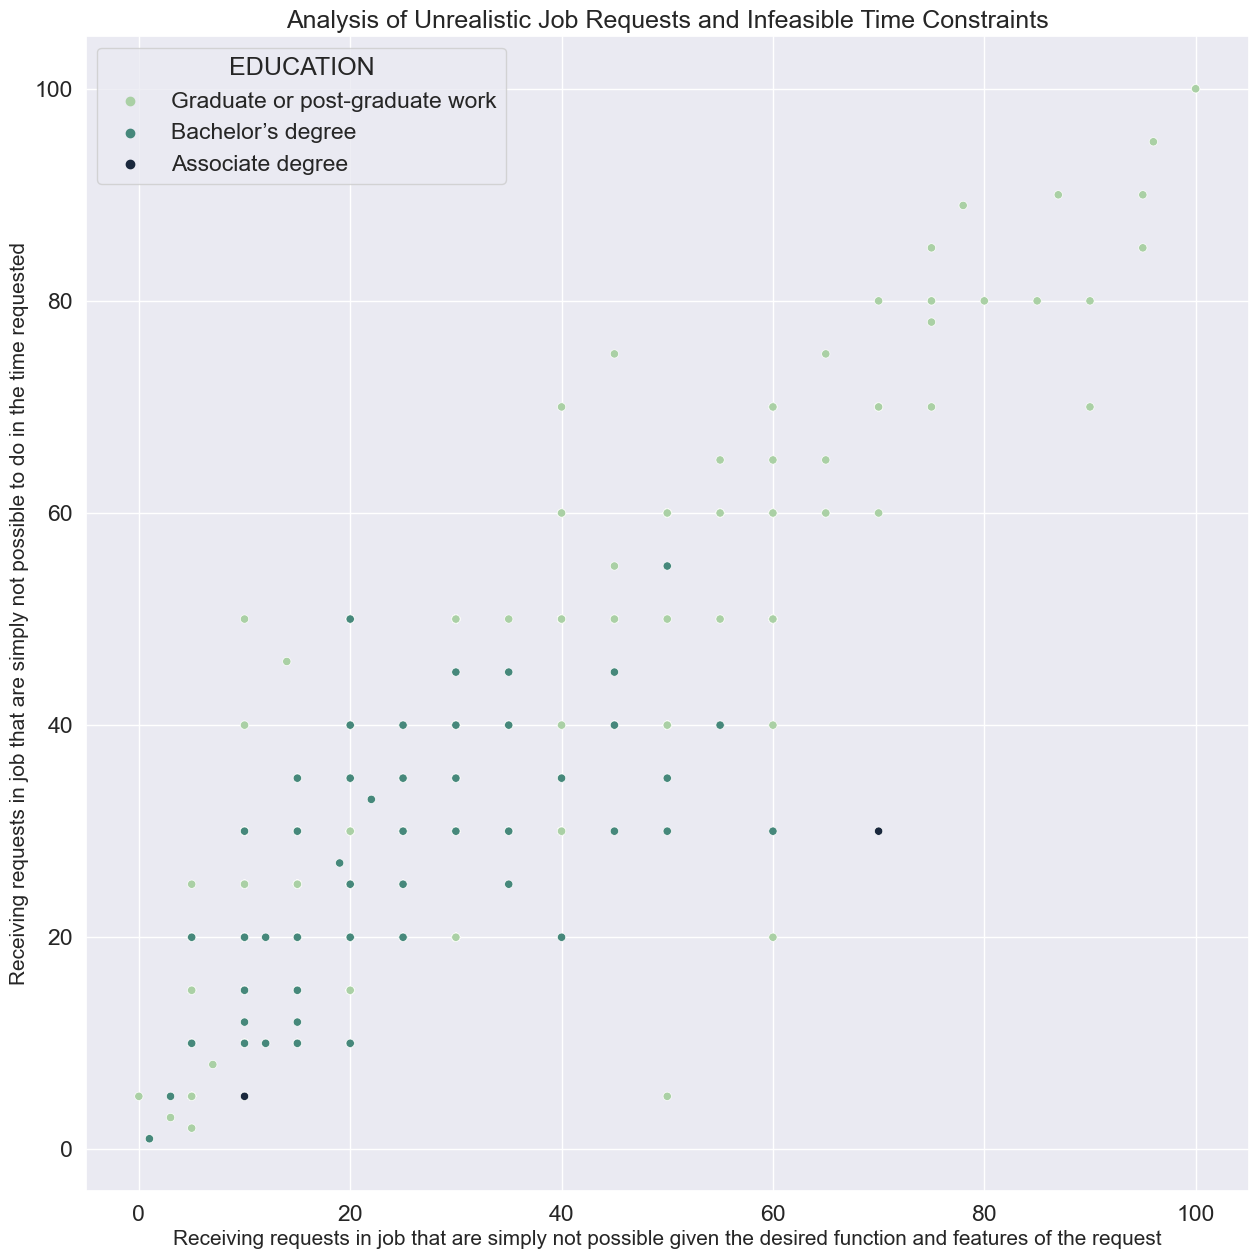

In [27]:
plt.figure(figsize=[15,15])
sns.scatterplot( x = "Q4", 
                 y = "Q3", 
                 data = df, 
                 hue = "EDUCATION",     
                palette="ch:r=-.5,l=.75"
               )
plt.ylabel("Receiving requests in job that are simply not possible to do in the time requested",fontsize=15)
plt.xlabel("Receiving requests in job that are simply not possible given the desired function and features of the request",fontsize=15)
plt.title('Analysis of Unrealistic Job Requests and Infeasible Time Constraints')
plt.show()

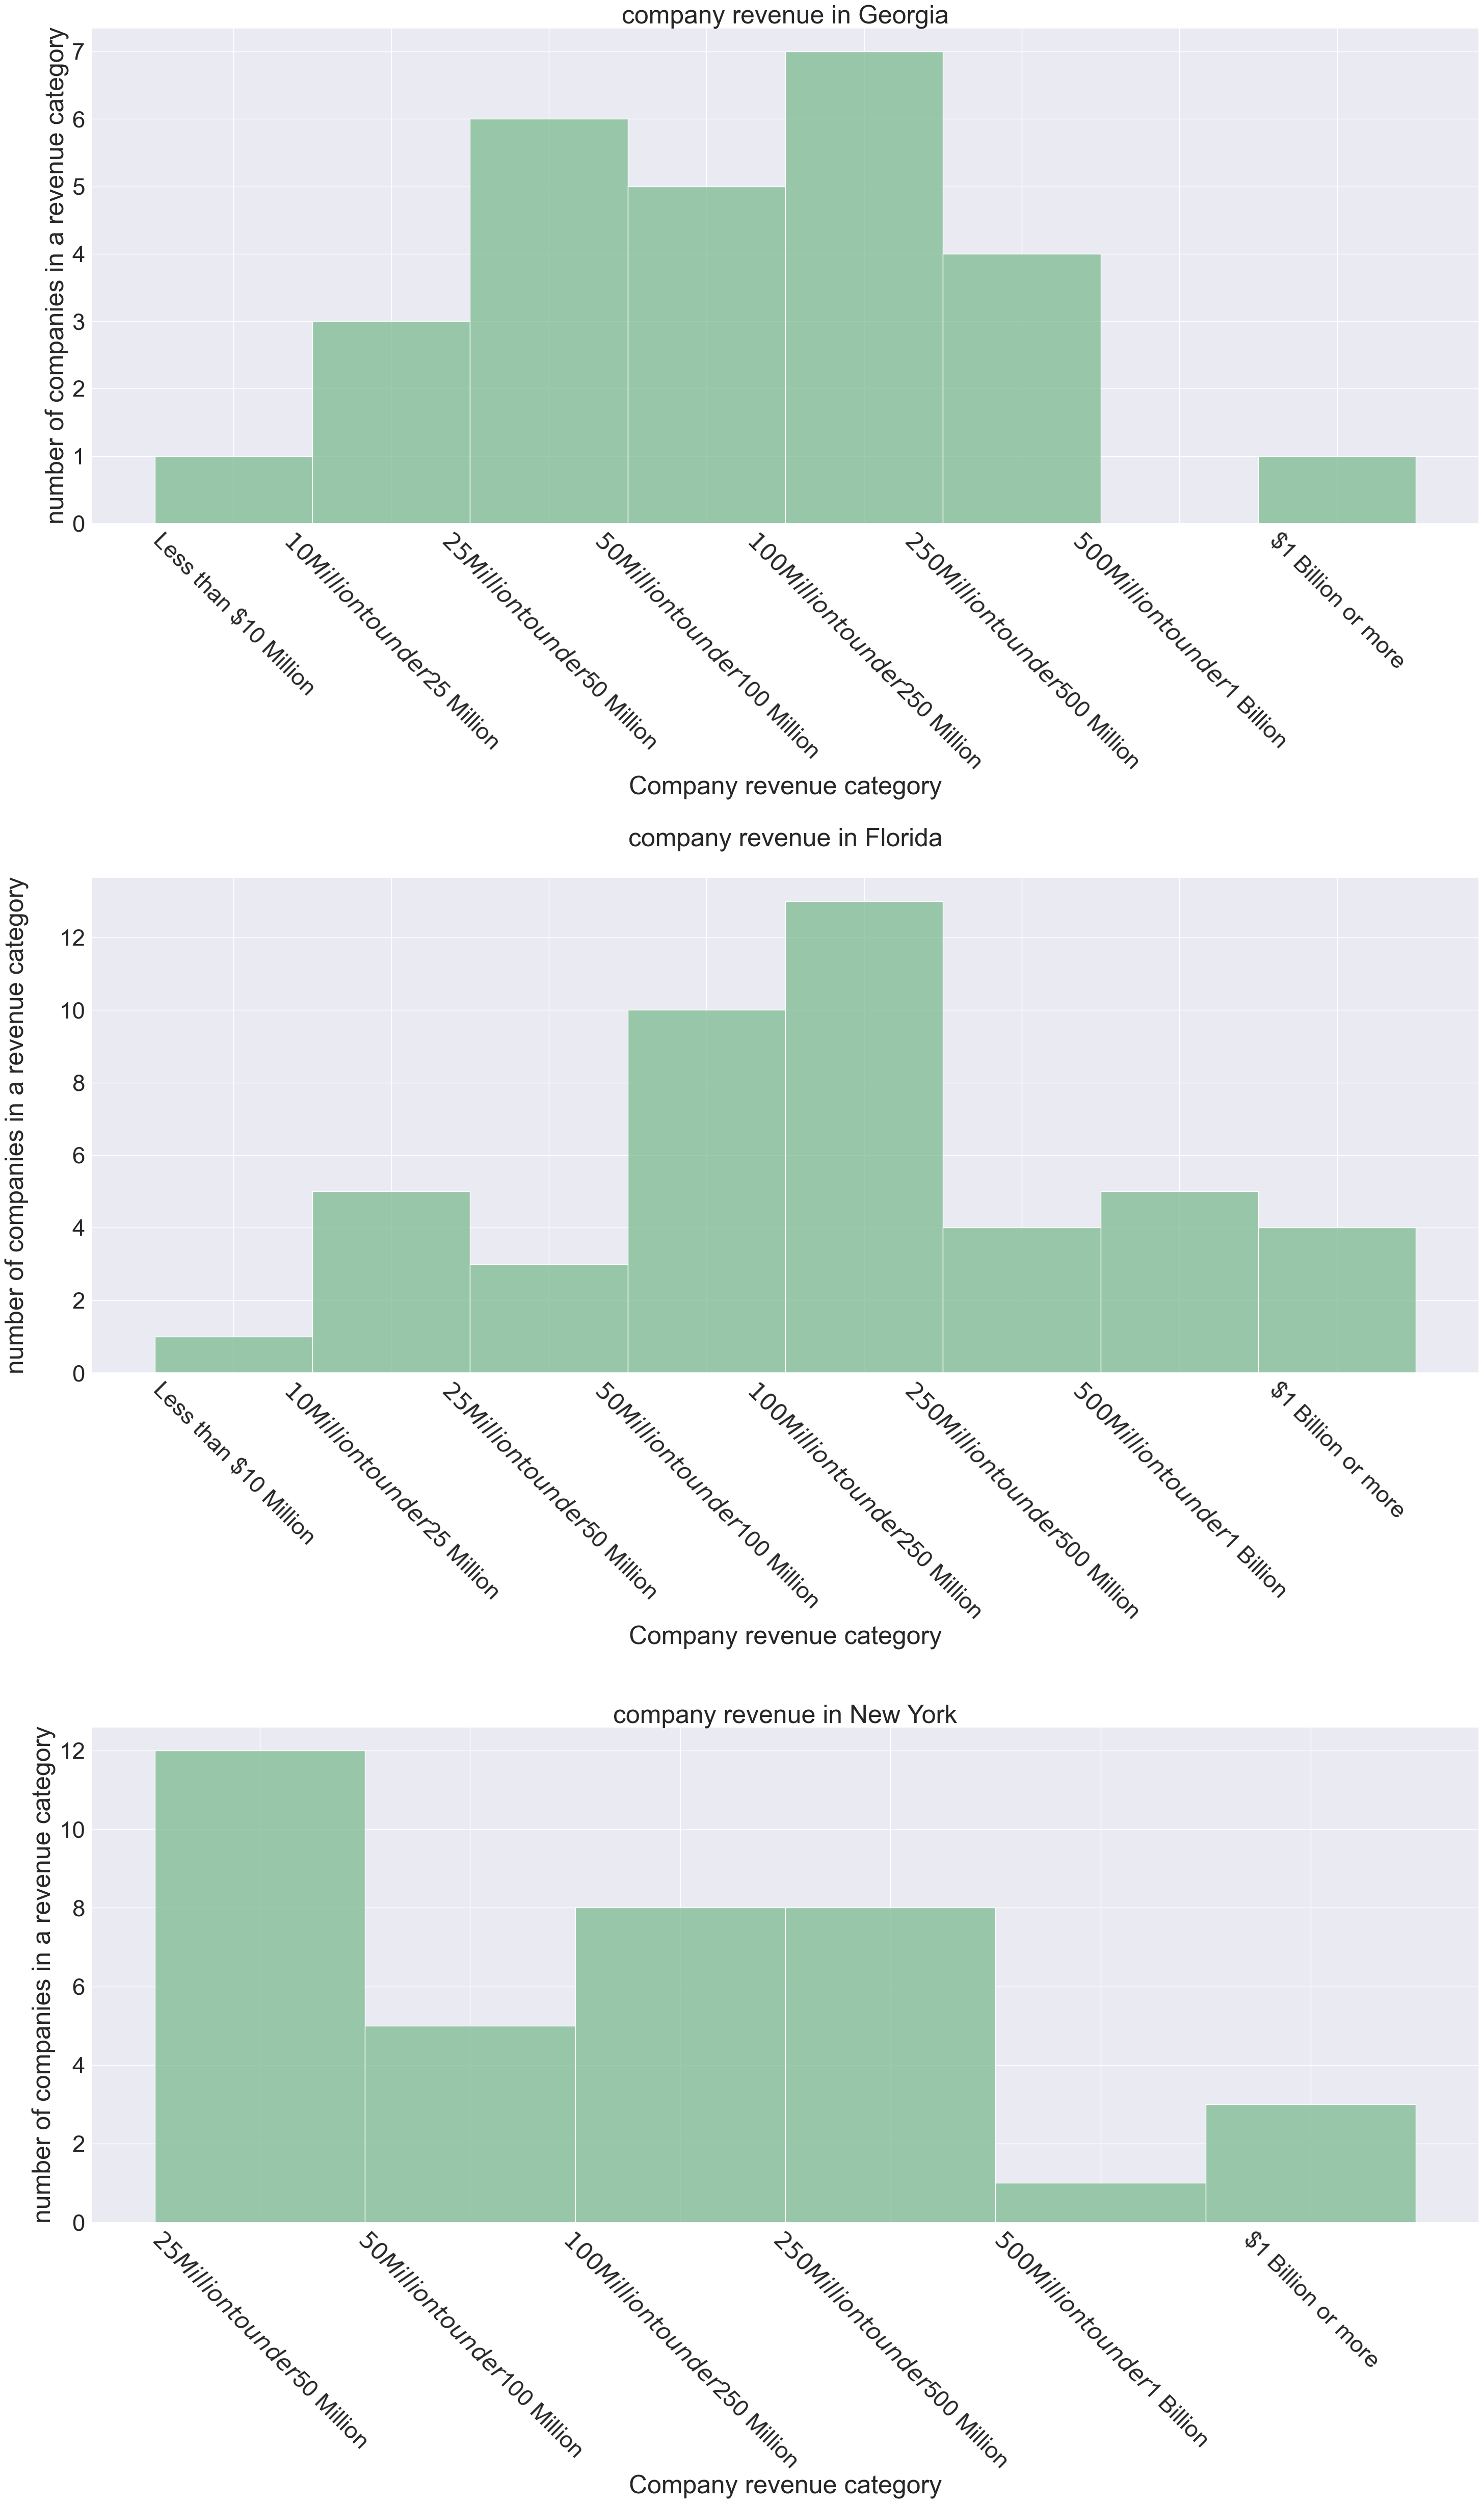

In [28]:
orderedRev = ['Less than $10 Million','$10 Million to under $25 Million','$25 Million to under $50 Million','$50 Million to under $100 Million','$100 Million to under $250 Million','$250 Million to under $500 Million','$500 Million to under $1 Billion','$1 Billion or more']
df['QI'] = pd.Categorical(df['QI'],orderedRev)
plt.figure(figsize=(30,50) )
sns.set(font_scale = 3)
sns.set_palette('crest')

plt.subplot(3,1,1)
revenue = sns.histplot(data = df[df['STATE']=='Georgia'], x = "QI")
plt.xticks(rotation=-45);
plt.title("company revenue in Georgia")
plt.ylabel("number of companies in a revenue category");
plt.xlabel("Company revenue category");
print('\n')
plt.subplot(3,1,2)
revenue = sns.histplot(data = df[df['STATE']=='Florida'], x = "QI")
plt.xticks(rotation=-45);
plt.title("company revenue in Florida\n")
plt.ylabel("number of companies in a revenue category\n");
plt.xlabel("Company revenue category\n");
print('\n')
plt.subplot(3,1,3)
revenue = sns.histplot(data = df[df['STATE']=='New York'], x = "QI")
plt.xticks(rotation=-45);
plt.title("company revenue in New York")
plt.ylabel("number of companies in a revenue category");
plt.xlabel("Company revenue category");


plt.tight_layout()

- from 3 states most of the revenue is between 100 to 500 million $

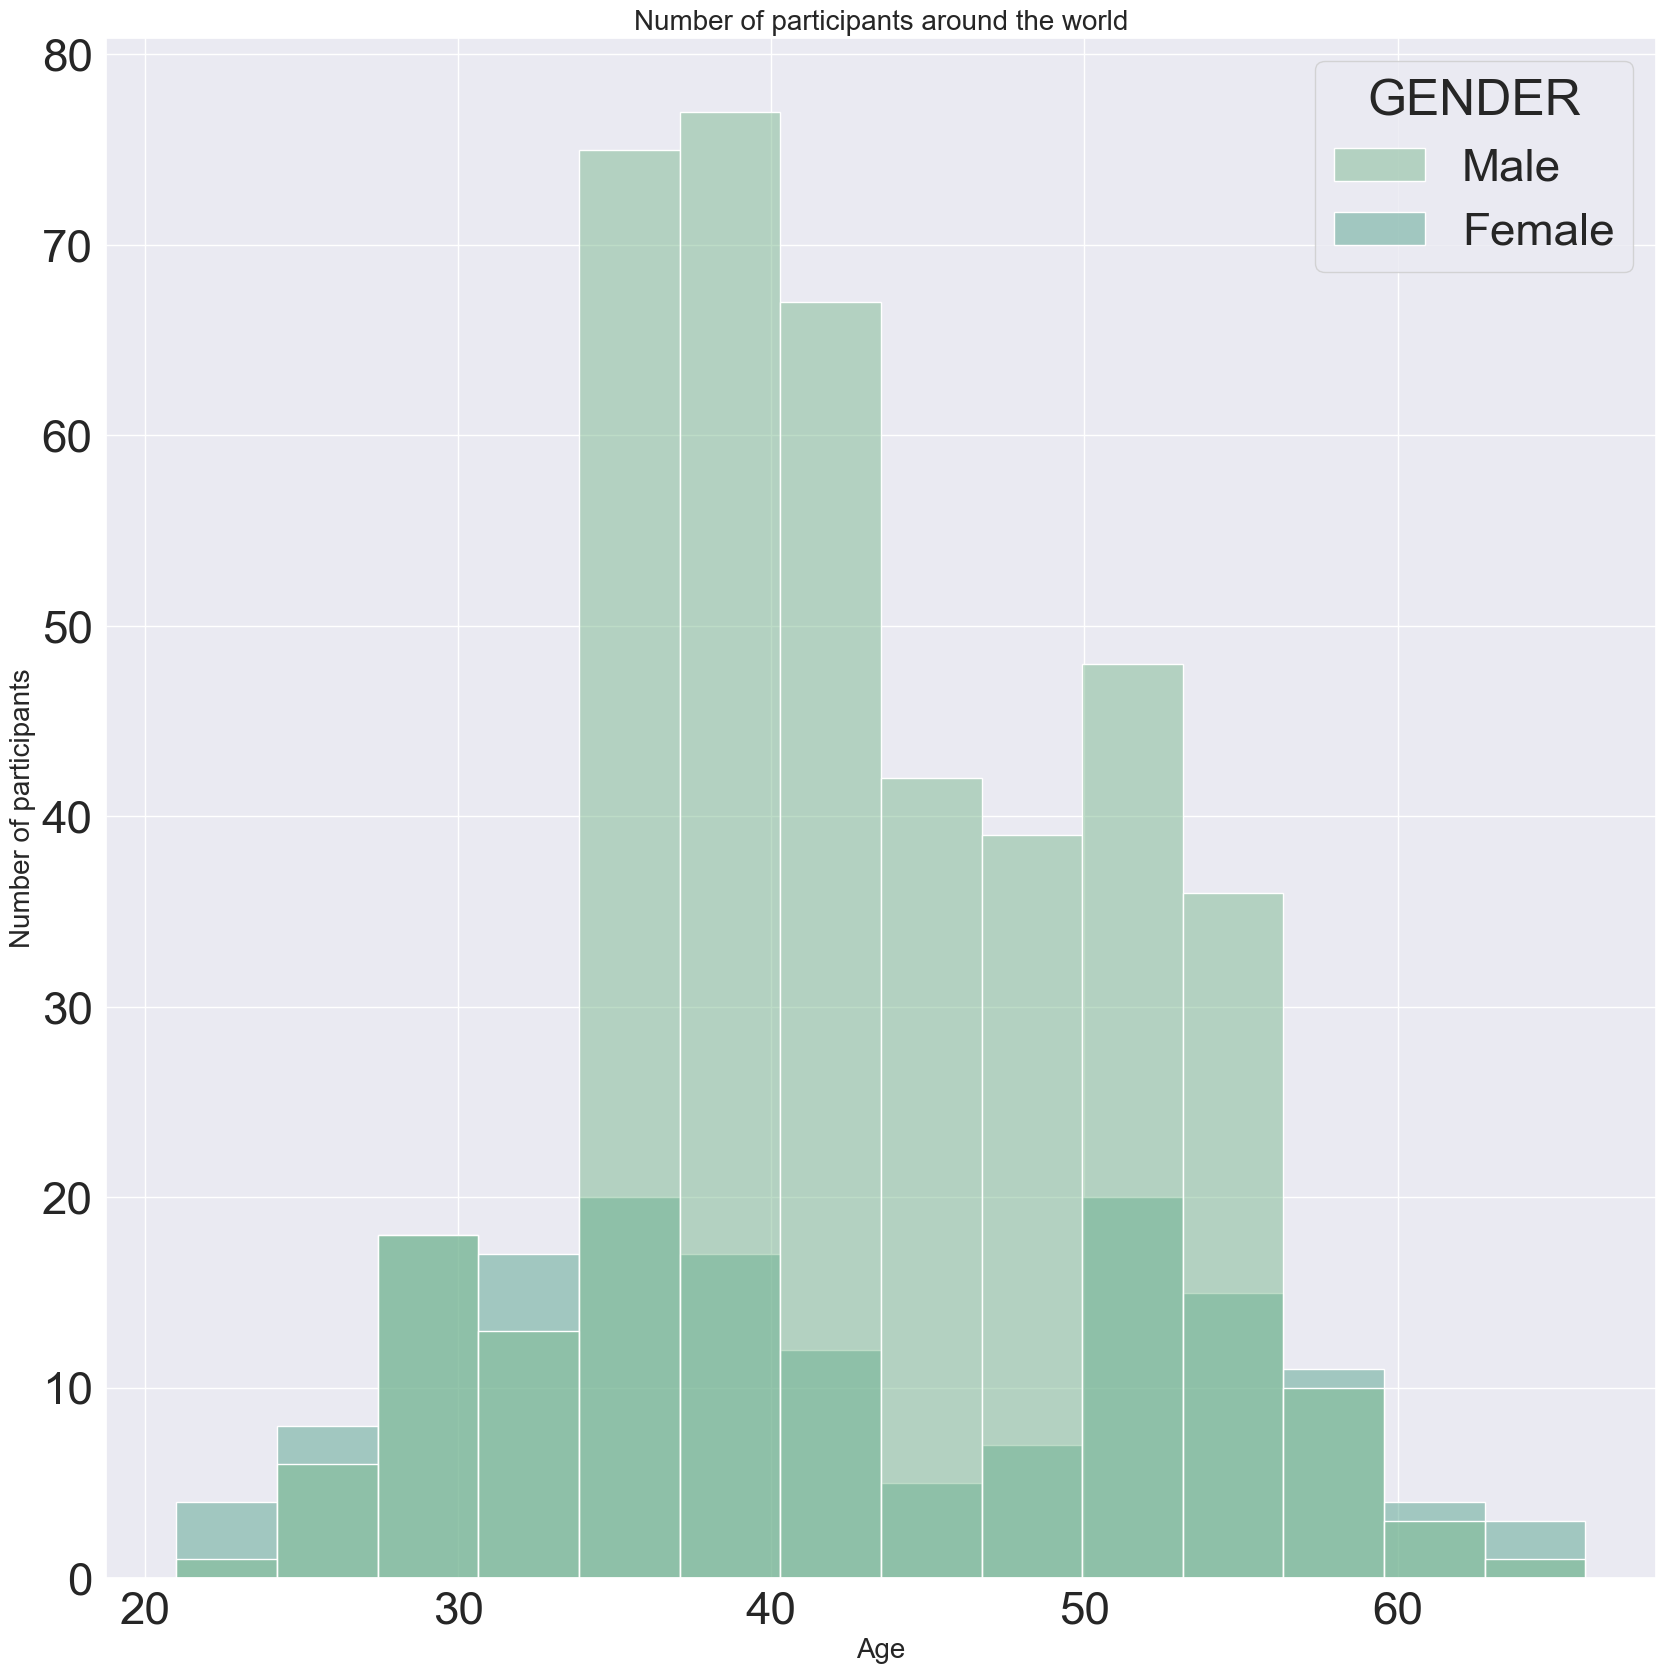

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=[20,20])
sns.histplot(x="AGE", data=df, hue="GENDER")
plt.xlabel('Age',fontsize=20)
plt.ylabel('Number of participants',fontsize=20)
plt.title('Number of participants around the world',fontsize=20)
plt.show()
###

# Data Correlation

### String Values to Integers

In [31]:
df = df.replace({"QD":
                 {
                     "We have not implemented DataOps into our processes, and have no plans to" : 1,
                     "We have not implemented DataOps into our processes, but have plans to": 2,
                     "We have partially implemented DataOps into our company’s data processes": 3,
                     "We have mostly or fully implemented DataOps into our company’s data processes":4
                 },
                  "Q1":
                  {
                     "We frequently hope and pray that things don’t break":1,
                      "We are confident they won’t break":2
                  },
                  "Q2":
                  {
                      "Never" : 1,
                      "Rarely" : 2,
                      "Sometimes" : 3,
                      "Often" : 4,
                      "All the time" : 5
                  },
                  "Q6":
                  {
                      "Disagree strongly" : 1,
                      "Disagree somewhat" : 2,
                      "Agree somewhat" : 3,
                      "Agree strongly" : 4
                  },
                  "Q7":
                  {
                      "Never" : 1,
                      "Rarely" : 2,
                      "Sometimes" : 3,
                      "Often" : 4,
                      "All the time" : 5
                  },
                  "Q8":
                  {
                      "Never" : 1,
                      "Rarely" : 2,
                      "Sometimes" : 3,
                      "Often" : 4,
                      "All the time" : 5
                  },
                  "Q9":
                  {
                      "Not at all likely" : 1,
                      "Not very likely" : 2,
                      "Somewhat likely" : 3,
                      "Very likely" : 4
                  },
                  "Q10":
                  {
                      "No, never" : 1,
                      "Yes, once" : 2,
                      "Yes, multiple times": 3
                  },
                  "Q11":
                  {
                      "We do not have formal data governance policies in place" : 0,
                      "Not at all difficult" : 1,
                      "Not very difficult" : 2,
                      "Somewhat difficult" : 3,
                      "Very difficult" : 4
                  },
                  "Q12":
                  {
                      "Not at all effectively" : 1,
                      "Not very effectively" : 2,
                      "Somewhat effectively" : 3,
                      "Very effectively" : 4
                  },
                  "Q13":
                  {
                      "Not at all important" : 1,
                      "Not very important" : 2,
                      "Somewhat important" : 3,
                      "Very important" : 4,
                      "Essential" : 5
                  },
                  "Q15":
                  {
                      "Disagree strongly" : 1,
                      "Disagree somewhat" : 2,
                      "Agree somewhat" : 3,
                      "Agree strongly" : 4
                  },
                  "QE":
                  {
                      "Less than one year" : 0
                  },
                  "QF":
                  {
                      "Less than one year" : 0
                  },
                  "QG":
                  {
                      "Less than one year" : 0,
                      "Less than a year" : 0,
                      "100 years or more" : 110
                  },
                  "QI":
                  {
                      "Less than $10 Million" : 1,
                      "$10 Million to under $25 Million": 2,
                      "$25 Million to under $50 Million": 3,
                      "$50 Million to under $100 Million": 4,
                      "$100 Million to under $250 Million" : 5,
                      "$250 Million to under $500 Million" : 6,
                      "$500 Million to under $1 Billion" : 7,
                      "$1 Billion or more" : 8
                  }
                }
               )


In [ ]:
# plt.figure(figsize=[40,40])
# sns.heatmap(df.corr(),
#             cmap="RdBu",
#             vmin=-1,
#             vmax=1,
#             annot=True
#            ) heatmap خربان

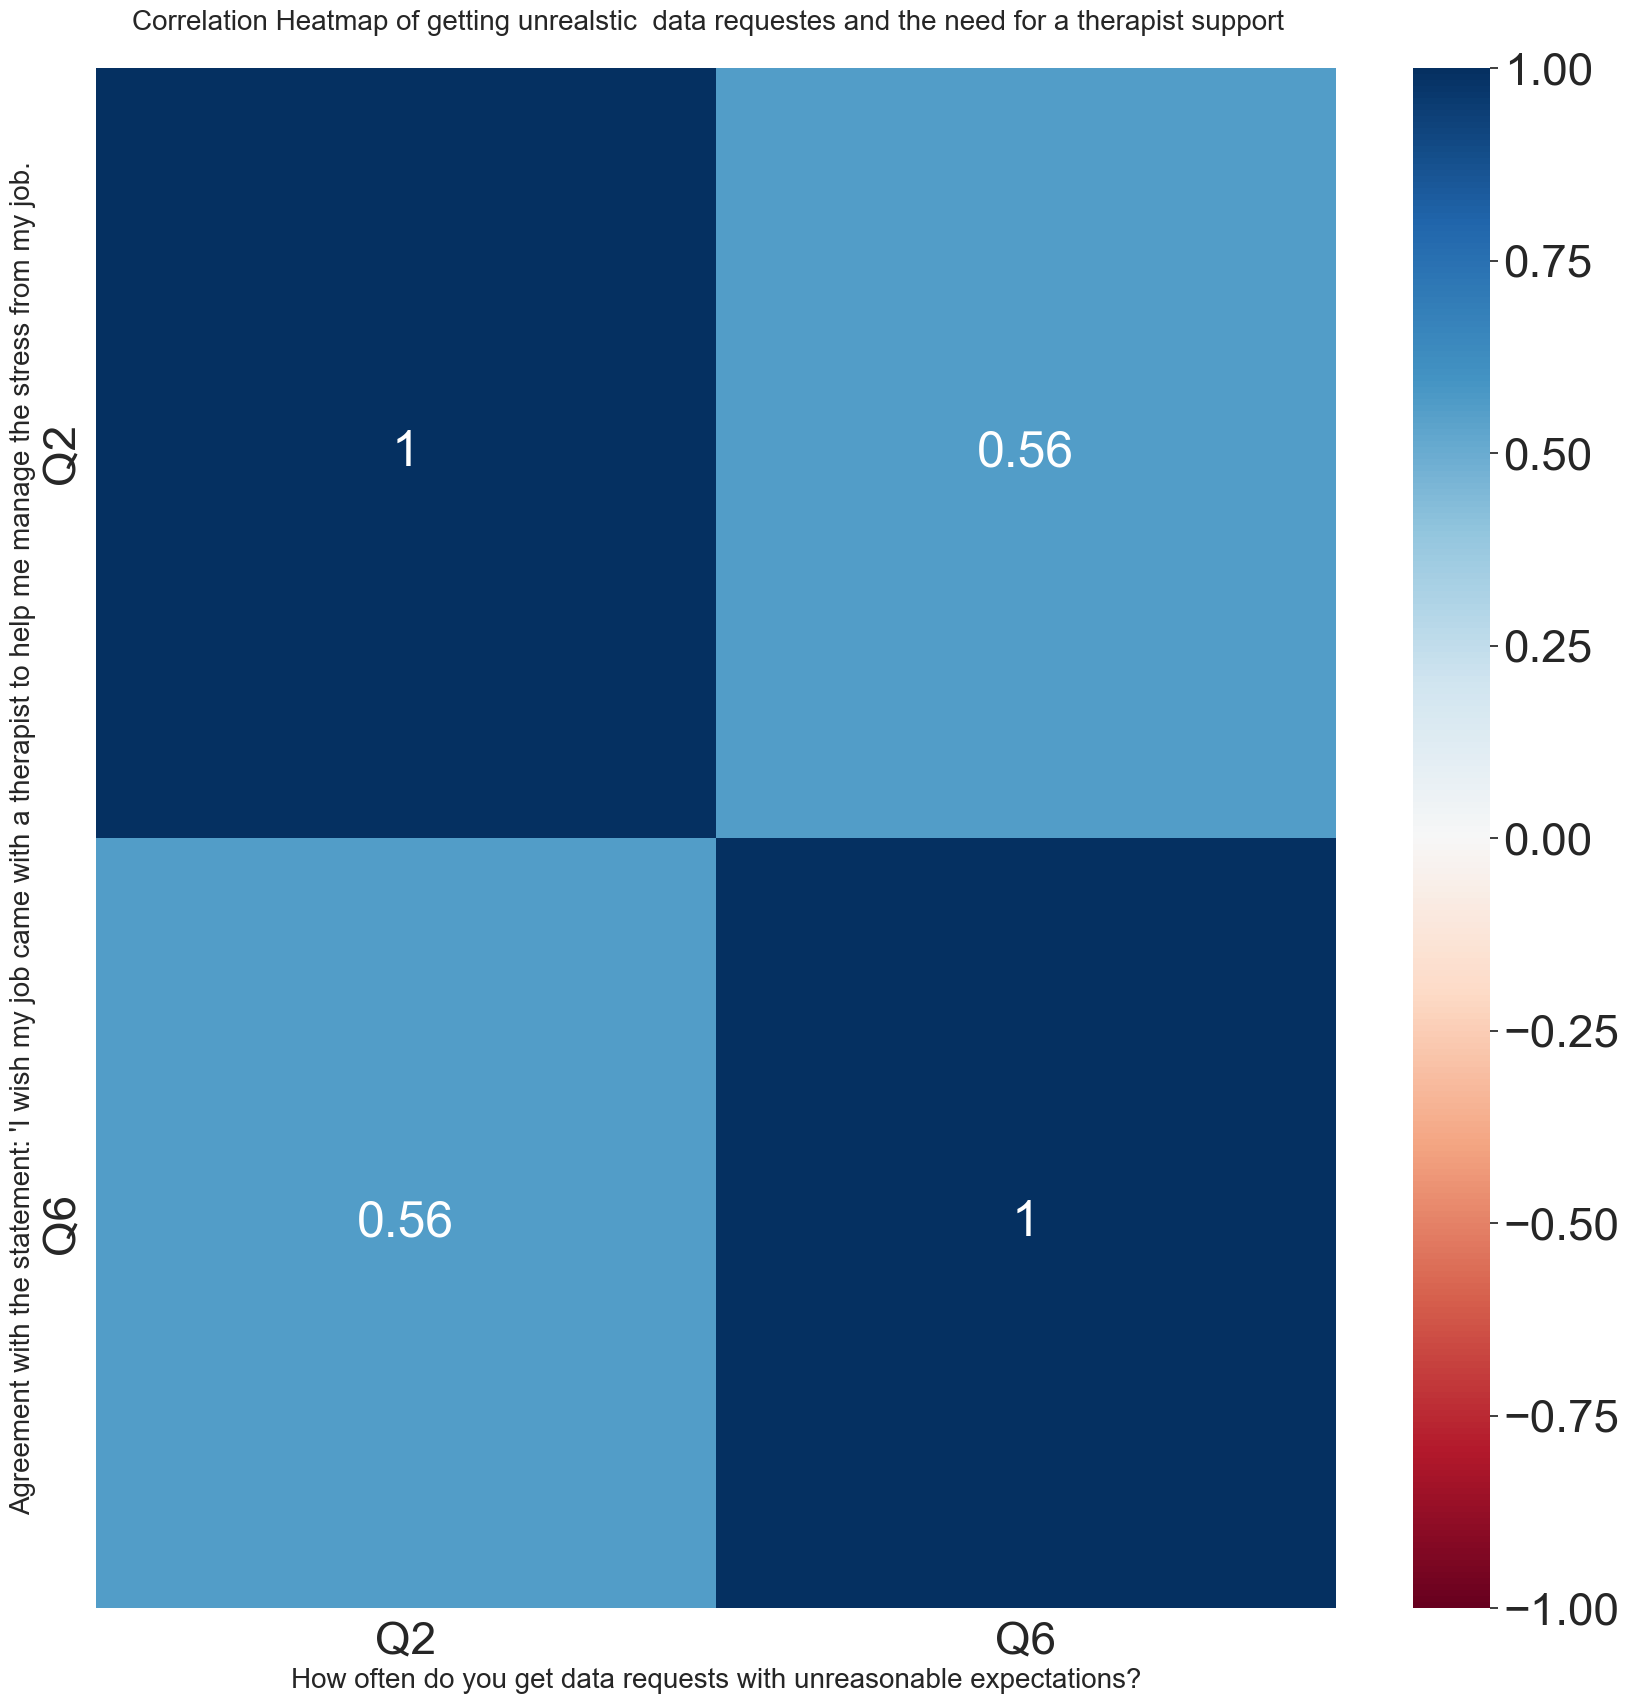

In [32]:
df4 = df[["Q2","Q6"]]
plt.figure(figsize=(20,20))
sns.heatmap(df4.corr(),
            cmap="RdBu",
            vmin=-1,
            vmax=1,
            annot=True
           )
plt.title('Correlation Heatmap of getting unrealstic  data requestes and the need for a therapist support  \n',fontsize=20)
plt.xlabel('How often do you get data requests with unreasonable expectations?',fontsize=20)
plt.ylabel("Agreement with the statement: 'I wish my job came with a therapist to help me manage the stress from my job.",fontsize=20)
plt.show()